# BoB ASIRI 2013 CTD χpod

This notebook will attempt to infer eddy diffusivity $K_e$ from the basin-wide transect of $χ, K_T$

\begin{equation}
K_e = \frac{⟨\widetilde{χ}⟩/2 - ⟨K_T \, ∂_z\widetilde{θ}⟩ \; ∂_zθ_m}{|∇θ_m|²}
\end{equation}

In [2]:
import eddydiff as ed

/home/deepak/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Transect TS plots

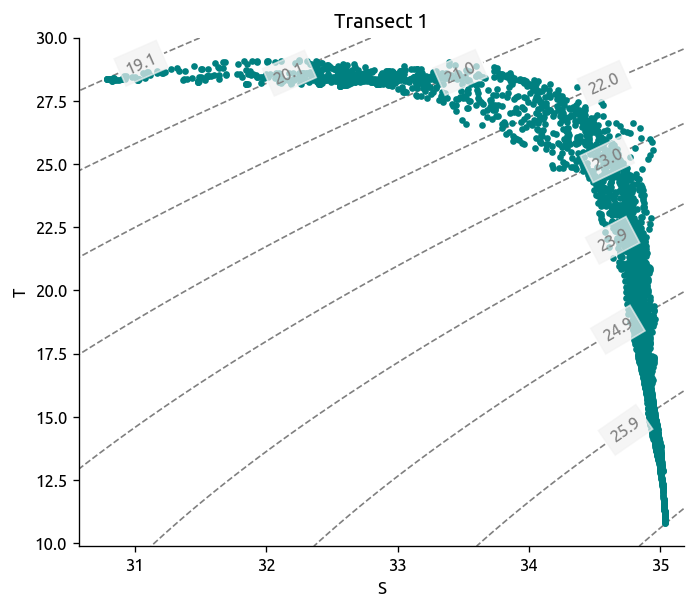

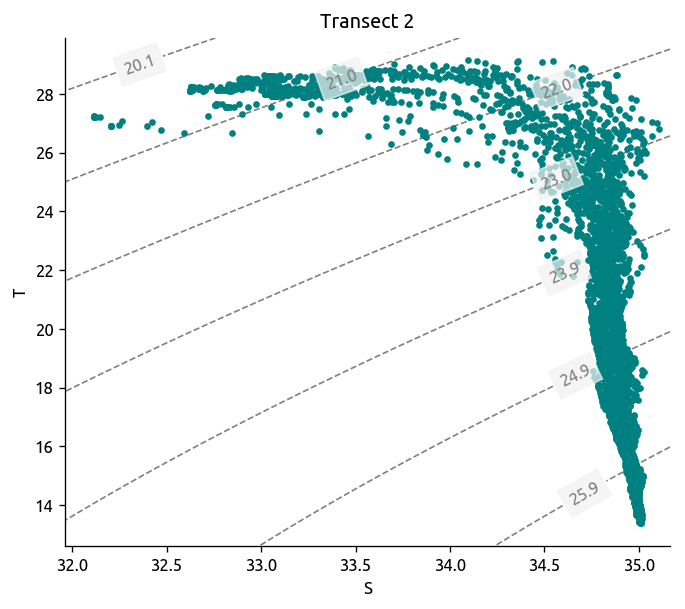

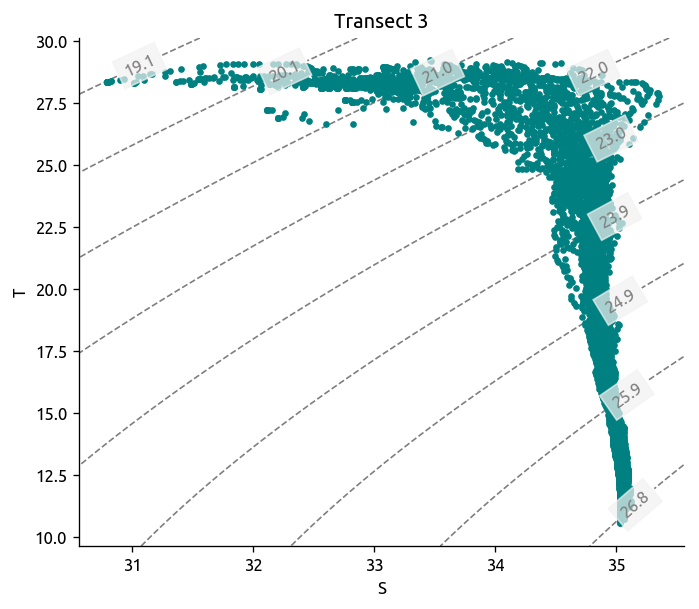

In [57]:
tr1 = xr.open_dataset("../datasets/bob-ctd-chipod/transect_1.nc", autoclose=True)
tr2 = xr.open_dataset("../datasets/bob-ctd-chipod/transect_2.nc", autoclose=True)
tr3 = xr.open_dataset("../datasets/bob-ctd-chipod/transect_3.nc", autoclose=True)

_, bins = pd.cut(tr1.rho.values.ravel(), 8, retbins=True)

dcpy.oceans.TSplot(tr1.S, tr1["T"], tr1.pres, rho_levels=bins - 1000)
plt.title("Transect 1")
plt.savefig("../images/bob-TS-transect-1.png", bbox_inches="tight")
dcpy.oceans.TSplot(tr2.S, tr2["T"], tr2.pres, rho_levels=bins - 1000)
plt.title("Transect 2")
plt.savefig("../images/bob-TS-transect-2.png", bbox_inches="tight")
dcpy.oceans.TSplot(tr3.S, tr3["T"], tr3.pres, rho_levels=bins - 1000)
plt.title("Transect 3")
plt.savefig("../images/bob-TS-transect-3.png", bbox_inches="tight")

## Read and plot single transect

/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


Text(0.5,1,'black=T, red=ρ')

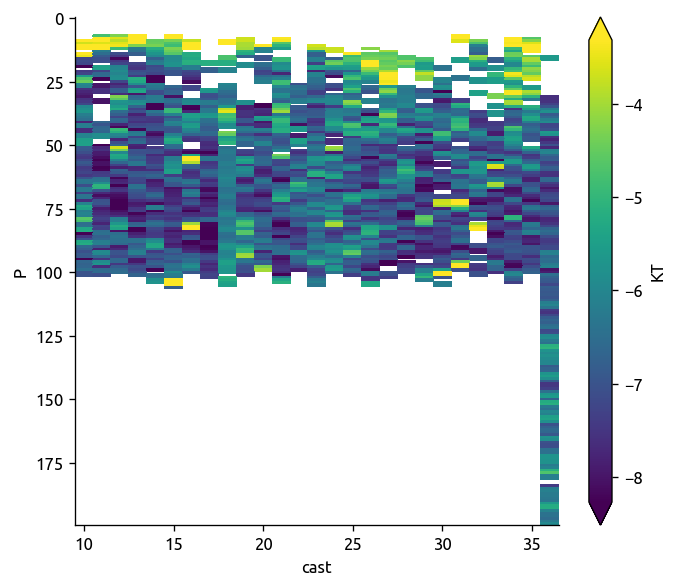

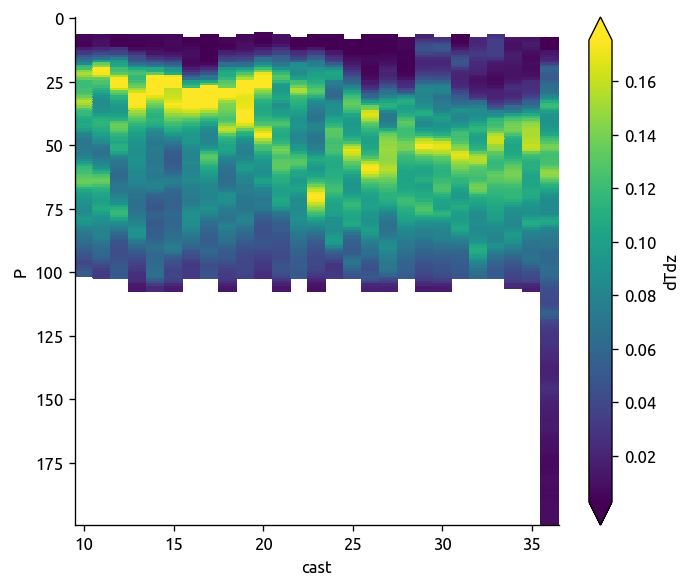

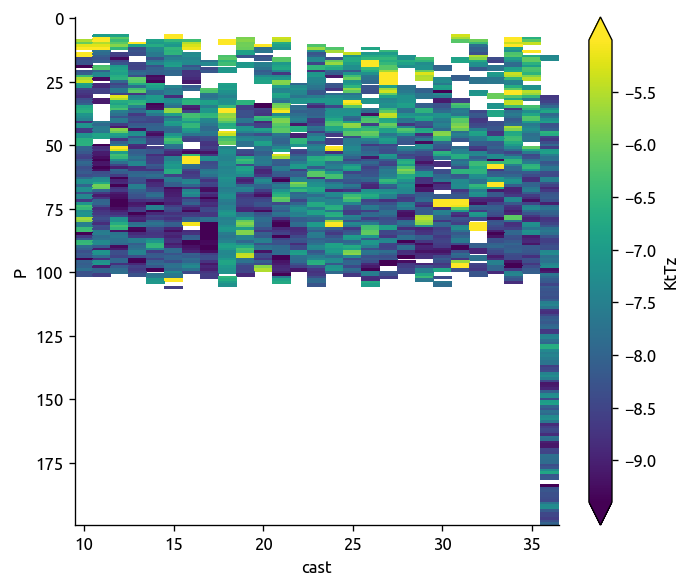

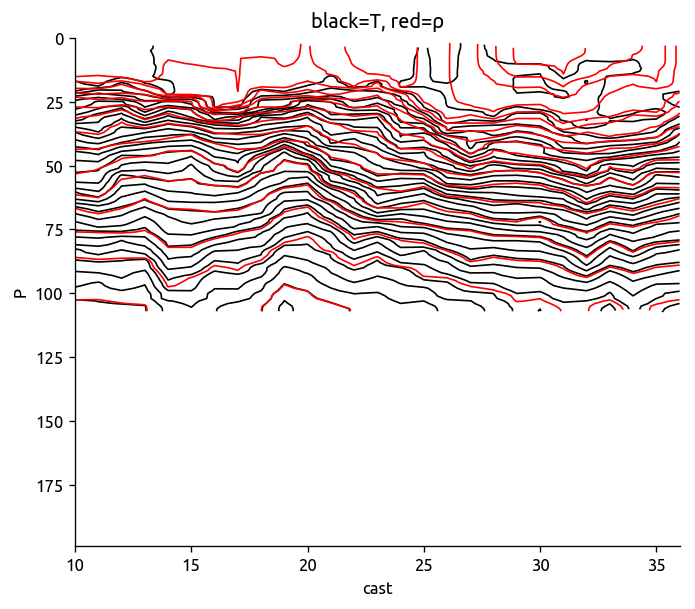

In [339]:
transect = xr.open_dataset(
    "../datasets/bob-ctd-chipod/transect_1.nc", autoclose=True
).sel(cast=slice(10, 36))

transect["KtTz"] = transect["KT"] * transect["dTdz"]
transect["Jq"] = 1025 * 4200 * transect["KtTz"]

transect["KtTz"].values[np.abs(transect["Jq"].values) > 500] = np.nan
transect["Jq"].values[np.abs(transect["Jq"].values) > 500] = np.nan

np.log10(transect["KT"]).plot(robust=True, yincrease=False)

plt.figure()
transect["dTdz"].plot(robust=True, yincrease=False)

plt.figure()
np.log10(transect["KtTz"]).plot(robust=True, yincrease=False)

plt.figure()
transect["T"].sel(cast=slice(10, 36)).plot.contour(
    levels=40, colors="k", robust=True, yincrease=False
)
transect["rho"].sel(cast=slice(10, 36)).plot.contour(
    levels=20, colors="r", robust=True, yincrease=False
)
plt.title("black=T, red=ρ")

# transect = transect.drop(30, dim='cast').sel(P=slice(None, 110))

Make sure $J_q$ isn't crazy

(array([ 30., 179., 503., 586., 491., 301., 138.,  67.,  36.,  25.]),
 array([-3.48594309, -2.87431314, -2.2626832 , -1.65105325, -1.03942331,
        -0.42779336,  0.18383659,  0.79546653,  1.40709648,  2.01872642,
         2.63035637]),
 <a list of 10 Patch objects>)

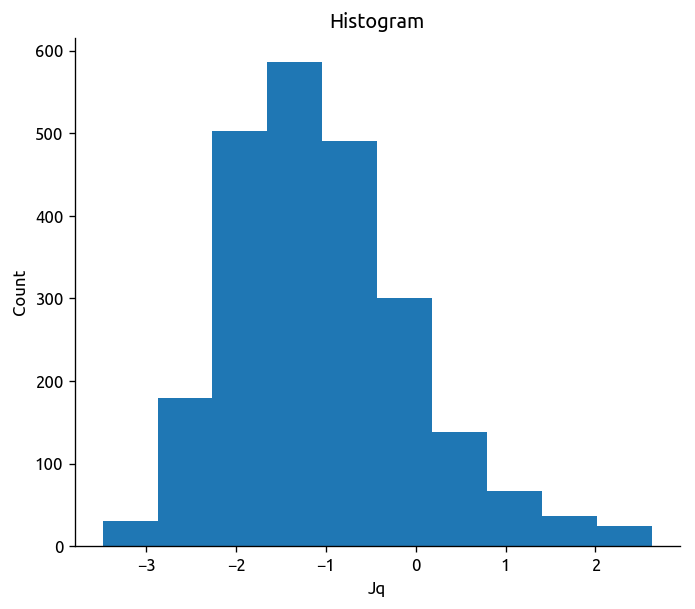

In [340]:
np.log10(np.abs(transect["Jq"])).plot.hist()

## Process transect data

In [3]:
transect = xr.open_dataset(
    "../datasets/bob-ctd-chipod/transect_1.nc", autoclose=True
).sel(cast=slice(10, 36))

transect["KtTz"] = transect["KT"] * transect["dTdz"]
transect["Jq"] = 1025 * 4200 * transect["KtTz"]
transect["KtTz"].values[np.abs(transect["Jq"].values) > 1000] = np.nan
transect["Jq"].values[np.abs(transect["Jq"].values) > 1000] = np.nan

transect = transect.sel(P=slice(None, 210))

# def process_transect
# takes transect in z-space as input.

trmean_rho = ed.transect_to_density_space(transect)

/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


## Read in other datasets

In [8]:
cole = ed.read_cole()

argograd = xr.open_dataset(
    "../datasets/argo_dec_iso_gradients.nc", decode_times=False, autoclose=True
).load()

eccograd = xr.open_dataset(
    "../datasets/ecco_monthly_iso_gradient.nc", decode_times=False, autoclose=True
).load()

## Using climatological gradients

In [14]:
eccoKe = ed.process_transect_1d(transect, eccograd, "ECCO transect1")
argoKe = ed.process_transect_1d(transect, argograd, "ARGO transect1")

Ke = pd.DataFrame()
Ke["ecco"] = eccoKe.Ke
Ke["argo"] = argoKe.Ke
# Ke['rho'] = Ke.ecco.index.mid.astype('float')
eccoKe

chi          KtTz      dTdz     dTmdz  \
rho                                                                
(1019.0, 1020.5]  1.087531e-07  3.332968e-06  0.017668 -0.019127   
(1020.5, 1021.0]  4.242331e-08  1.787747e-06  0.023994 -0.015216   
(1021.0, 1022.4]  1.383193e-07  7.649035e-07  0.099101  0.010196   
(1022.4, 1023.5]  7.467831e-08  3.012975e-07  0.131284  0.106301   
(1023.5, 1024.2]  1.822328e-07  7.604694e-07  0.121188  0.130226   
(1024.2, 1024.9]  2.110117e-07  1.077232e-06  0.107393  0.113445   
(1024.9, 1025.4]  1.015220e-07  5.481218e-07  0.093691  0.091905   
(1025.4, 1025.8]  1.114811e-07  6.400163e-07  0.079396  0.082158   
(1025.8, 1026.1]  1.349486e-07  8.839158e-07  0.060302  0.077620   
(1026.1, 1026.5]  2.656529e-08  4.195098e-07  0.041820  0.076793   

                         dTiso        KT             Ke  
rho                                                      
(1019.0, 1020.5]  2.065550e-06  0.000894   -2196.788029  
(1020.5, 1021.0]  3.913078e-06  0.003574    -391.230758  
(1021.0, 1022.4]  1.521268e-06  0.000010   26514.376375  
(1022.4, 1023.5]  1.086169e-06  0.000003    4501.655168  
(1023.5, 1024.2]  7.190793e-07  0.000006  -15309.981990  
(1024.2, 1024.9]  4.345696e-07  0.000011  -88435.950761  
(1024.9, 1025.4]  2.953978e-07  0.000006    4423.677911  
(1025.4, 1025.8]  2.854238e-07  0.000007   38766.088873  
(1025.8, 1026.1]  2.923084e-07  0.000105  -13281.205312  
(1026.1, 1026.5]  2.593703e-07  0.000235 -281430.091207

/home/deepak/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:847: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/home/deepak/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:849: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


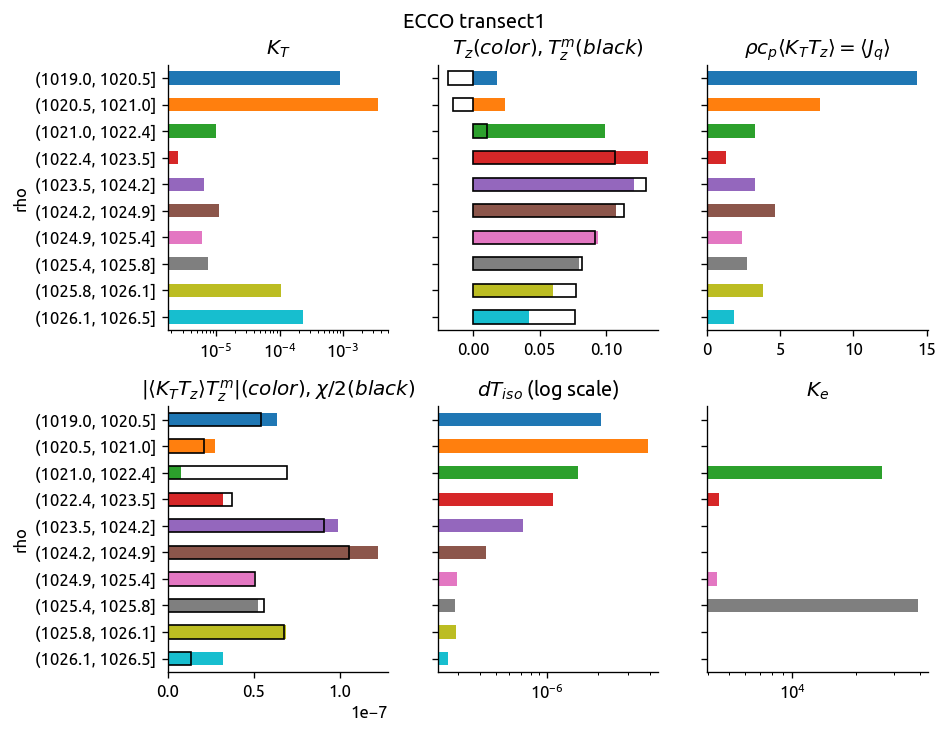

In [16]:
ed.plot_bar_Ke(eccoKe)
# ed.plot_bar_Ke(argoKe)

In [30]:
plt.figure()
argomean.dTdia.plot(x="rho")
eccomean.dTdia.plot(x="rho")
(trmean.dTdz).plot(x="rho")
plt.legend(["argo", "ecco", "transect"])

plt.figure()
argomean.dTiso.plot(x="rho")
eccomean.dTiso.plot(x="rho")

NameError: name 'argomean' is not defined

<Figure size 780x660 with 0 Axes>

In [12]:
(
    ecco.dTiso.sel(lat=slice(transect.lat.min(), transect.lat.max()))
    .sel(lon=transect.lon.mean(), method="nearest")
    .plot.contourf(robust=True, yincrease=False)
)

(
    ecco.Tmean.sel(lat=slice(transect.lat.min(), transect.lat.max()))
    .sel(lon=transect.lon.mean(), method="nearest")
    .plot.contour(robust=True, colors="w", yincrease=False)
)

plt.gca().set_ylim([200, 0])

NameError: name 'ecco' is not defined

## Naveira Garabato et al. (2016) approach

For turbulence quantities, the averaging operator ⟨⟩ operates *only* in the vertical direction.

Mean temperature field is determined by spline smoothing on isopycnals and then differentiated to get "large-scale" gradients.

### Calculation

In [470]:
# 1. convert to density space
#############################
trdens = ed.to_density_space(transect1)
Tdens = trdens["T"]

# 2. fit cubic spline along isopycnal
# - this needs to take ρbins as input?
#####################################
Tdens_i = ed.smooth_cubic_spline(trdens["T"], False)
Pdens_i = ed.smooth_cubic_spline(trdens["P"], False)
Tsmooth = ed.to_depth_space(Tdens_i, Pold=Pdens_i, Pnew=None)

# 3. calculate gradients with smoothed field
############################################
dTiso, dTdia = ed.calc_iso_dia_gradients(Tdens_i, Pdens_i)
dTmdz = ed.to_density_space(-ed.xgradient(Tsmooth, "P"))
dTmdz.name = "dz"

# 4. Bin smoothed gradients by density
######################################
ρbins = Tdens_i.rho[::2]
dTdf = (
    ed.exchange(xr.merge([dTdia, dTiso]), {"cast": "dist"}).to_dataframe().reset_index()
)
dTmean = ed.bin_avg_in_density(dTdf, ρbins)
transmean = ed.bin_avg_in_density(trdens.to_dataframe().reset_index(), ρbins)

# 5. do estimate
################
transKe = xr.Dataset()
transKe["Ke"] = (transmean.chi / 2 - transmean.KtTz * dTmean.dia) / dTmean.iso**2
transKe.Ke.name = "$K_e$"
transKe["KT"] = transmean.KT
transKe["KtTz"] = transmean.KtTz
transKe["dTdz"] = transmean.dTdz
transKe["chi"] = transmean.chi
transKe["dTmdz"] = dTmean.dia
transKe["dTiso"] = dTmean.iso
transKe["rho"].values = np.round(transKe.rho.values, decimals=2)
transKe.attrs.name = "BoB CTD χpod"

ed.plot_transect_Ke(transKe)

ed.plot_bar_Ke(transKe.isel(cast=20).to_dataframe())

/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1775: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1775: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1776: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1776: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1777: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1777: RuntimeWarning: invalid value encountered in t

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

### Debugging plots

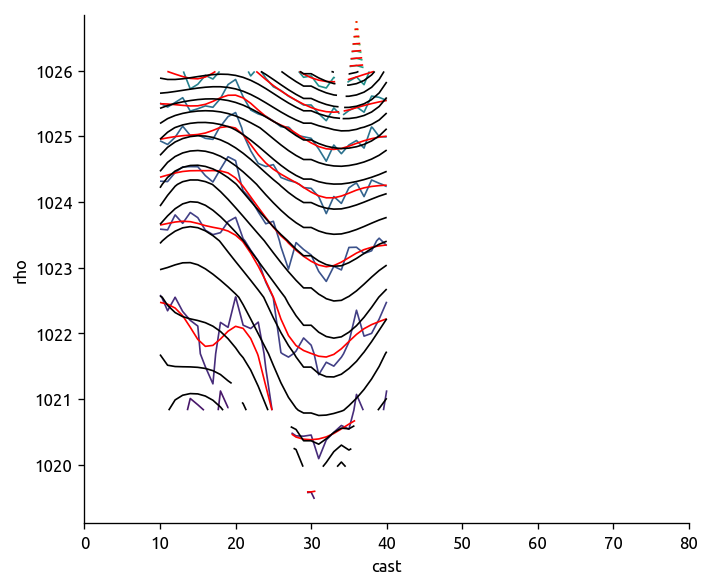

In [471]:
trdens = ed.to_density_space(transect1)
Tdens = trdens['T']trdens['P'].plot.contour(levels=20)
dcpy.ts.xfilter(trdens['P'], dim='cast', flen=10).plot.contour(
    colors='r', levels=20)
Pdens_i.plot.contour(levels=20, colors='k')

### Distributions: dT/dz and dT_diapycnal

The distributions of (dT/dz)\_ρ is different from (dT/dz)\_z which is maybe not surprising but the difference is a factor of 2, this makes me suspicious.

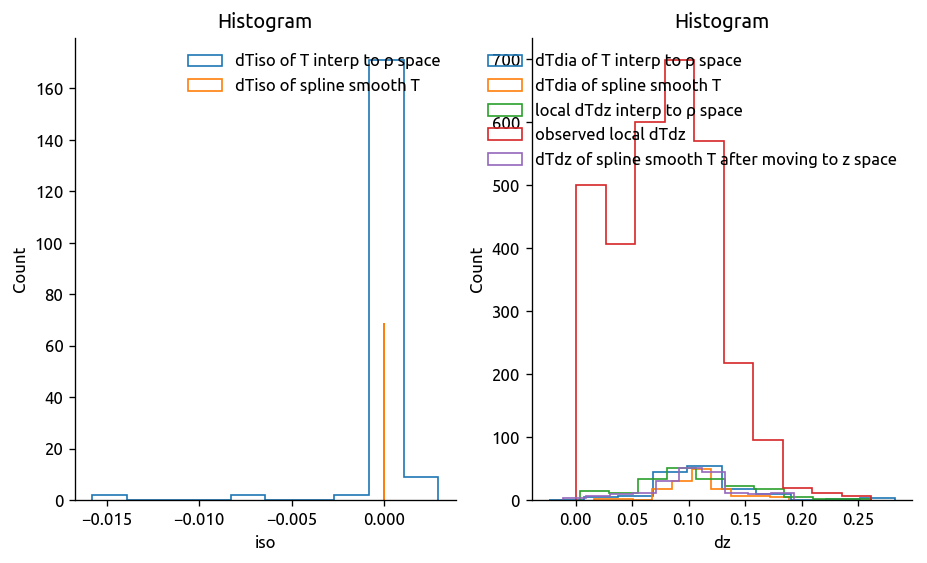

In [73]:
dTi, dTd = ed.calc_iso_dia_gradients(trdens["T"], trdens["P"])
dTi_i, dTd_i = ed.calc_iso_dia_gradients(Tdens_i, Pdens_i)

histargs = {"histtype": "step"}

f, ax = plt.subplots(1, 2)
dTi.plot.hist(ax=ax[0], **histargs)
dTi_i.plot.hist(ax=ax[0], **histargs)
ax[0].legend(["dTiso of T interp to ρ space", "dTiso of spline smooth T"])

dTd.plot.hist(ax=ax[1], **histargs)
dTd_i.plot.hist(ax=ax[1], **histargs)
trdens["dTdz"].plot.hist(ax=ax[1], **histargs)
transect["dTdz"].plot.hist(ax=ax[1], **histargs)
dTmdz.plot.hist(ax=ax[1], **histargs)
plt.gca().legend(
    [
        "dTdia of T interp to ρ space",
        "dTdia of spline smooth T",
        "local dTdz interp to ρ space",
        "observed local dTdz",
        "dTdz of spline smooth T after moving to z space",
    ]
)

f.set_size_inches(9, 5)

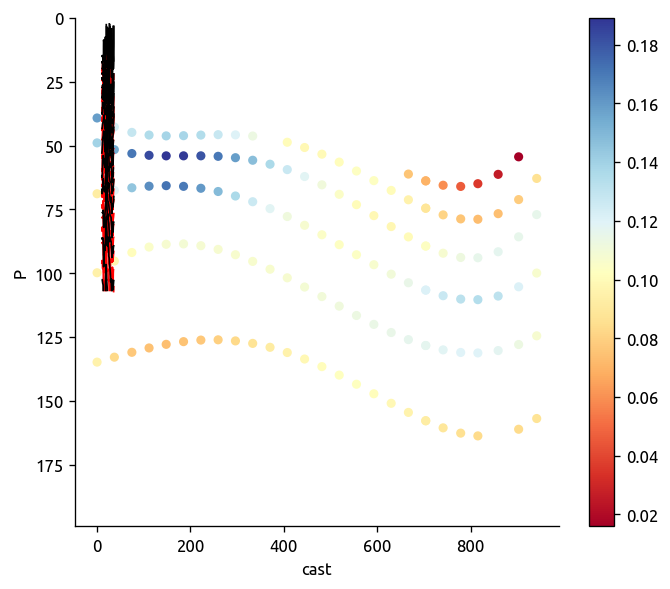

In [15]:
%matplotlib inline

plt.scatter(
    xr.broadcast(trdens["dist"], Pdens_i)[0].T, Pdens_i, 20, dTd_i, cmap=mpl.cm.RdYlBu
)
plt.gca().invert_yaxis()
plt.colorbar()


transect["T"].plot.contour(colors="r", levels=30, yincrease=False)
transect["rho"].plot.contour(levels=25, colors="k", yincrease=False)

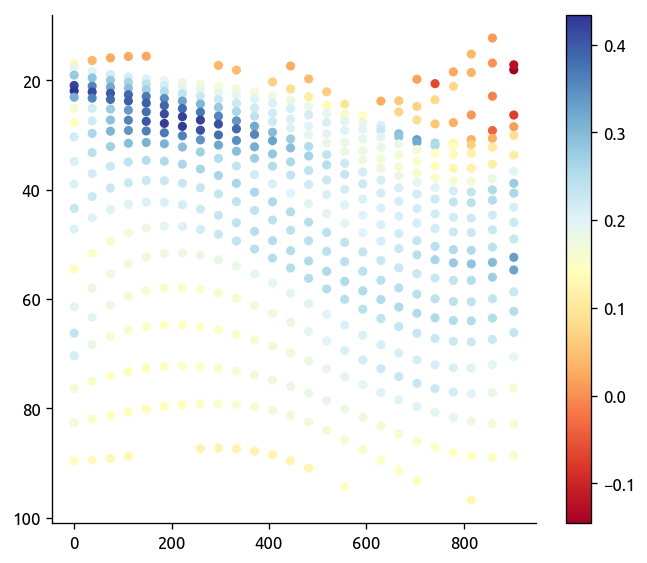

In [20]:
%matplotlib inline
plt.scatter(
    xr.broadcast(trdens["dist"], Pdens_i)[0].T, Pdens_i, 20, dTd_i, cmap=mpl.cm.RdYlBu
)
plt.gca().invert_yaxis()
plt.colorbar()

TypeError: 'numpy.ndarray' object is not callable

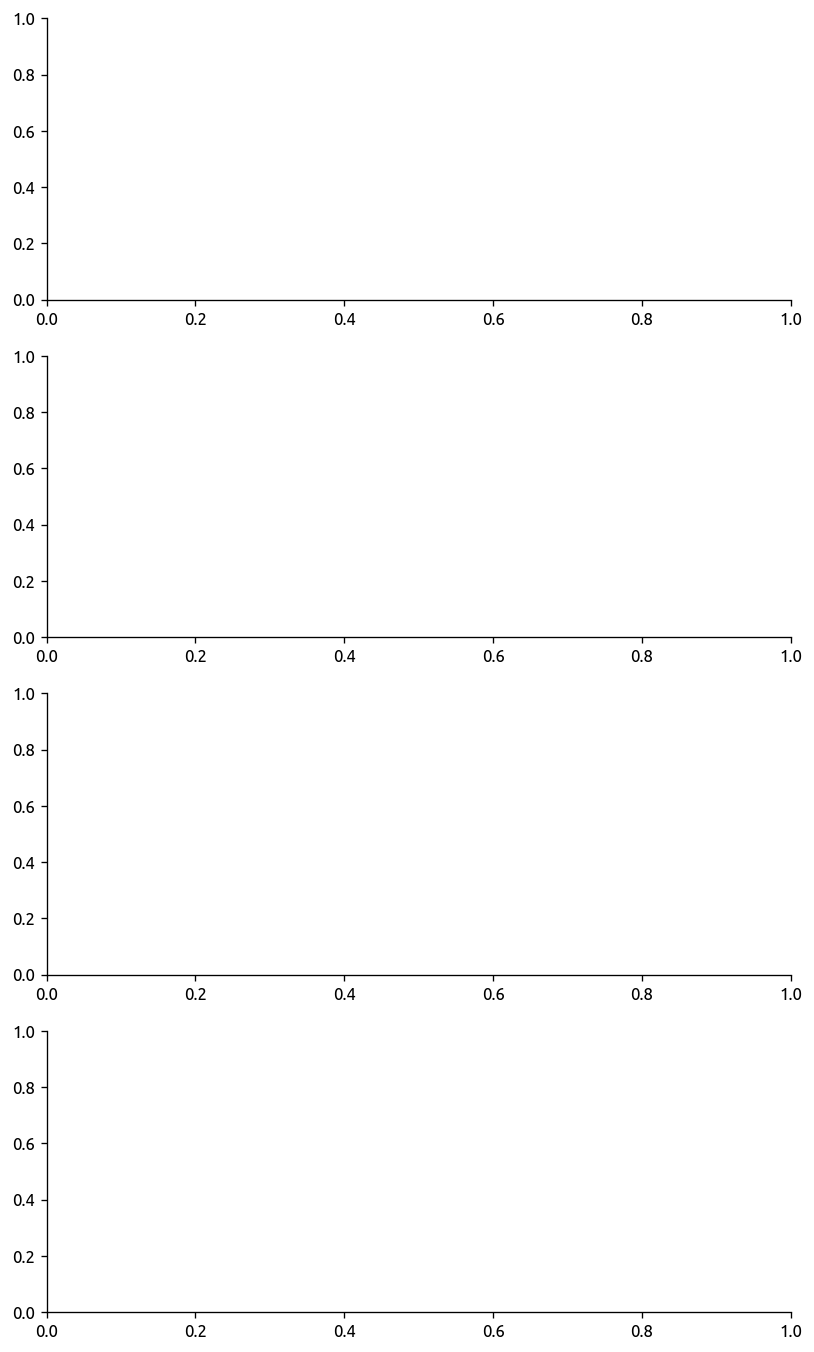

In [326]:
###################################
# sample mean fields along transect
###################################
seltrans = dict(lon=transect.lon, lat=transect.lat, method="nearest")

f, ax = plt.subplots(4, 1)
f.set_size_inches(8, 14)

(
    eccograd.dTiso.sel(pres=slice(200, 0, -1))
    .sel(**seltrans)
    .plot(ax=ax[0], cmap=mpl.cm.Reds)
)
(
    eccograd.Tmean.sel(pres=slice(200, 0, -1))
    .sel(**seltrans)
    .plot.contour(ax=ax[0], levels=20, colors="w")
)
ax[0].set_ylim([200, 0])

# plots
Tdens.plot.contourf(levels=50, ax=ax[1], cmap=mpl.cm.RdYlBu_r, yincrease=False)
Tdens_i.plot.contour(levels=50, colors="k", ax=ax[1], yincrease=False)
trdens.P.plot.contour(levels=20, colors="lightgray", ax=ax[1], yincrease=False)


np.abs(dTiso).plot(ax=ax[2], cmap=mpl.cm.Reds, robust=True, yincrease=False)
Tdens_i.plot.contour(levels=50, colors="k", ax=ax[2], yincrease=False)
# trdens.P.plot.contour(levels=20, colors='lightgray', ax=ax[2], yincrease=False)

dTdia.plot(ax=ax[3], robust=True, yincrease=False)
Tdens_i.plot.contour(levels=50, colors="k", ax=ax[3], yincrease=False)
Pdens_i.plot.contour(levels=20, colors="lightgray", ax=ax[3], yincrease=False)

(100, 0)

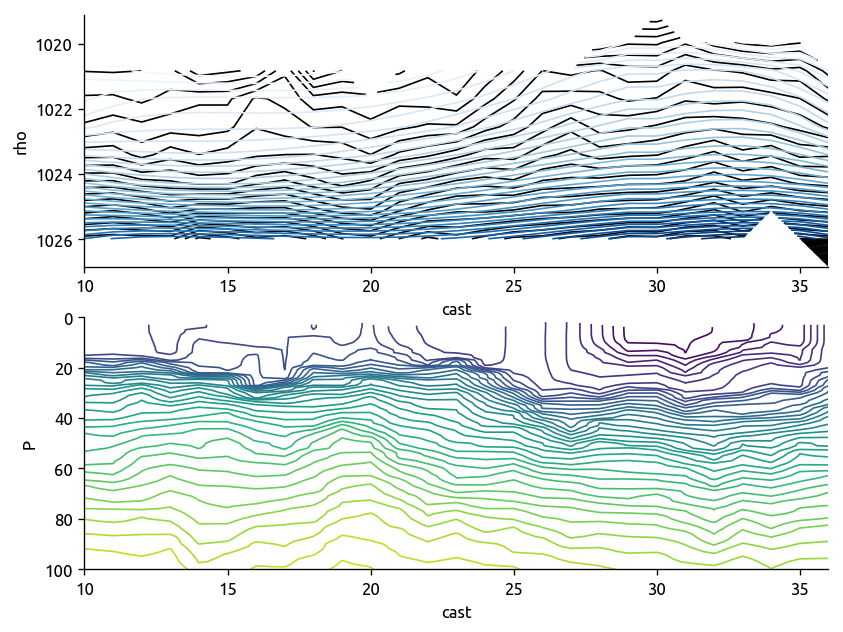

In [18]:
f, ax = plt.subplots(2, 1)
f.set_size_inches(8, 6)
trdens["P"].plot.contour(ax=ax[0], yincrease=False, levels=50, colors="k")
Pdens_i.plot.contour(ax=ax[0], yincrease=False, levels=40, cmap=mpl.cm.Blues)
transect["rho"].plot.contour(ax=ax[1], yincrease=False, levels=50)
ax[1].set_ylim([100, 0])

## Ferrari & Polzin (2005) approach

They average all data on density surfaces, estimate mean depth of isopycnal $z_n$ and calculate diapycnal gradient. The result is a vertical profile of eddy diffusivity. All spatial variations are averaged over.

They calculate an isopycnal gradient by doing a plane fit along isopycnals to all the data. This is required for the finestructure estimate

In [76]:
transKe

<xarray.Dataset>
Dimensions:  (dist: 26, rho: 14)
Coordinates:
  * dist     (dist) float64 0.0 37.02 74.47 111.3 148.0 185.1 222.2 259.1 ...
  * rho      (rho) float64 1.02e+03 1.02e+03 1.021e+03 1.021e+03 1.022e+03 ...
Data variables:
    Ke       (dist, rho) float64 nan nan nan -293.5 -517.0 -2.837e+03 ...
    KT       (dist, rho) float64 nan nan 0.0003355 6.889e-08 2.743e-08 ...
    KtTz     (dist, rho) float64 nan nan 1.664e-06 4.679e-09 2.365e-09 ...
    dTdz     (dist, rho) float64 nan nan 0.004763 0.06767 0.1226 0.1494 ...
    chi      (dist, rho) float64 nan nan 1.865e-08 6.313e-10 3.188e-10 ...
    dTmdz    (dist, rho) float64 nan nan nan 0.1624 0.3492 0.3736 0.1541 ...
    dTiso    (dist, rho) float64 nan nan -1.973e-06 -1.23e-06 1.135e-06 ...

In [323]:
# def transect_fp(trdens):

trdens = ed.to_density_space(transect)

dTiso = xr.DataArray(
    np.ones_like(trdens.rho) * np.nan, dims=["rho"], coords={"rho": trdens.rho}
)

# fit straight lines to get mean gradients
# FP do a plane fit in 2D
for idx, rr in enumerate(trdens.rho):
    Tvec = trdens["T"].sel(rho=rr)
    mask = ~np.isnan(Tvec)

    if mask.sum() < 3:
        continue

    dTiso[idx], _, _, _, _ = sp.stats.linregress(trdens.dist[mask] * 1000, Tvec[mask])

trmean = trdens.mean(dim="cast")
trmean

Tmean = ed.to_depth_space(
    trmean["T"].expand_dims(["cast"]), Pold=trmean["P"].expand_dims(["cast"])
).mean(dim="cast")
rhomean = ed.to_depth_space(
    trmean["rho"].expand_dims(["cast"]), Pold=trmean["P"].expand_dims(["cast"])
).mean(dim="cast")

_, Tsmooth = ed.fit_spline(Tmean.P, Tmean, k=2)

# Tmean.plot()
dTdz = ed.xgradient(-Tsmooth, dim="P")
dTdz.coords["rho"] = rhomean

dTdz = dTdz.expand_dims(["cast"])
dTdz["rho"] = dTdz.rho.expand_dims(["cast"])

dTmdz = ed.to_density_space(dTdz).mean(dim="cast")

fpKe = xr.Dataset()
fpKe["chi"] = trmean.chi
fpKe["dTmdz"] = trmean.dTdz
fpKe["dTiso"] = dTiso
fpKe["KtTz"] = trmean.KtTz
fpKe["KT"] = trmean.KT
fpKe["dTdz"] = trmean.dTdz

fpKe["Ke"] = np.abs(fpKe.chi / 2 - fpKe.KtTz * fpKe.dTmdz) / fpKe.dTiso**2

ed.plot_bar_Ke(fpKe.to_dataframe())

AttributeError: 'DataFrame' object has no attribute 'variables'

## Without interpolating to convert to density space

(<scipy.interpolate.fitpack2.UnivariateSpline at 0x7f917a7ad6d8>,
 array([26.25453411, 26.27269832, 26.26237948, 26.22850841, 26.17573395,
        26.10729261, 26.02839219, 25.94359928, 25.85682278, 25.77302511,
        25.69583305, 25.63065117, 25.58101885, 25.55179105, 25.54613198,
        25.56238605, 25.59792679, 25.64976453, 25.7146301 , 25.79062798,
        25.79063393, 25.87376963, 25.95664316, 26.02779096, 26.08732754,
        26.10676851, 26.07836197]))

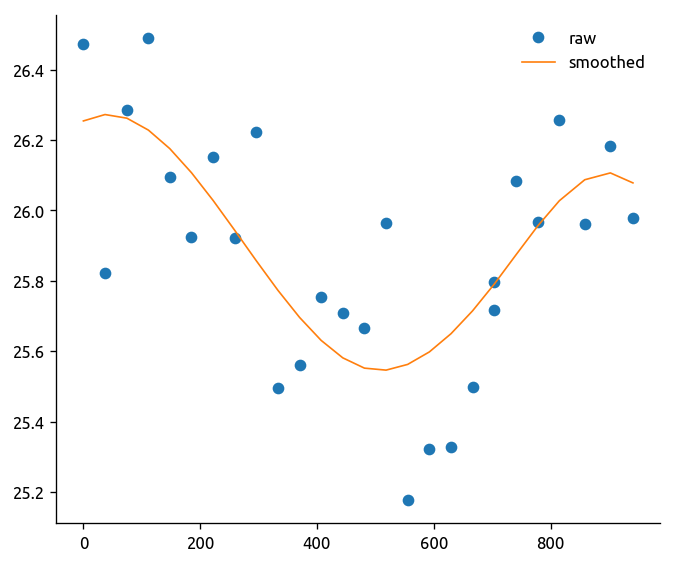

In [472]:
mask = ~np.isnan(trmean_rho["T"].isel(rho=5))
ed.fit_spline(
    trmean_rho["dist"][mask].values,
    trmean_rho["T"].isel(rho=5)[mask].values,
    debug=True,
)

/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/deepak/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


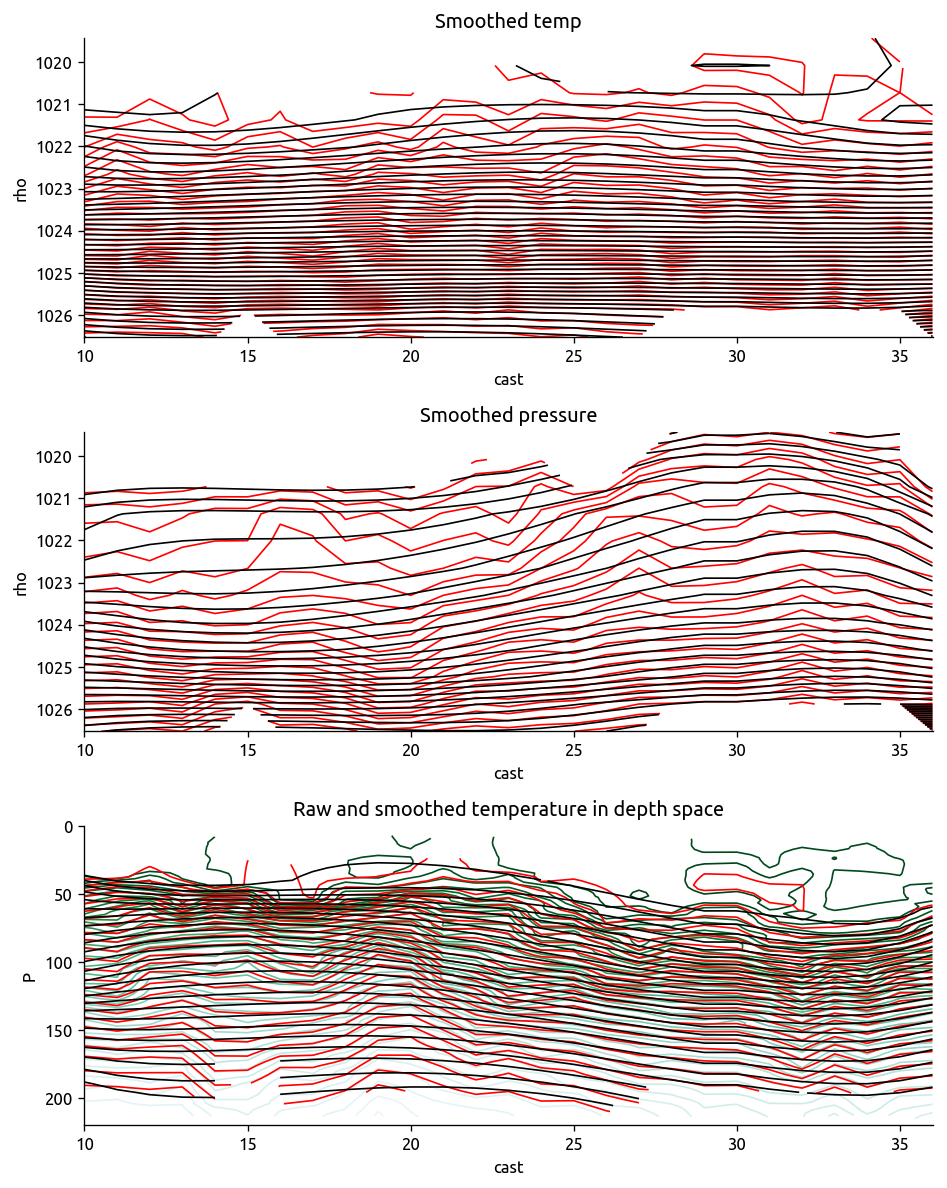

In [449]:
# Run Section 1.3 first
# 2. Generate mean field T, P using cubic splines to smooth
#    Calculate Trms as RMS of deviations from smoothed T field

trmean_rho["Tmean"] = ed.smooth_cubic_spline(trmean_rho["T"])
trmean_rho.Tmean.attrs["name"] = "Smoothed temperature"

trmean_rho["Pmean"] = ed.smooth_cubic_spline(trmean_rho["P"])
trmean_rho.Pmean.attrs["name"] = "Smoothed pressure"


def check_spline_smoothing(T, Ts, P, Ps, Traw, Praw):
    f, ax = plt.subplots(3, 1)

    T.plot.contour(ax=ax[0], y="rho", levels=50, colors="r")
    Ts.plot.contour(ax=ax[0], y="rho", levels=50, colors="k", yincrease=False)

    P.plot.contour(ax=ax[1], y="rho", levels=50, colors="r")
    Ps.plot.contour(ax=ax[1], y="rho", levels=50, colors="k", yincrease=False)

    # cmat, rhomat = xr.broadcast(T.cast, T.rho)
    # ax[2].contour(cmat, P, T, levels=50, colors='r')

    Tz = ed.to_depth_space(T, P)
    Tzs = ed.to_depth_space(Ts, Ps)

    ax[2].contour(
        xr.broadcast(Traw.cast, Praw)[0], Praw.T, Traw.T, 50, cmap=mpl.cm.BuGn
    )
    Tz.plot.contour(ax=ax[2], x="cast", levels=30, colors="r")
    Tzs.plot.contour(ax=ax[2], x="cast", levels=30, colors="k", yincrease=False)

    f.set_size_inches((8, 10))
    ax[0].set_title("Smoothed temp")
    ax[1].set_title("Smoothed pressure")
    ax[2].set_title("Raw and smoothed temperature in depth space")
    ax[2].set_ylim([220, 0])
    plt.tight_layout()


check_spline_smoothing(
    trmean_rho["T"],
    trmean_rho["Tmean"],
    trmean_rho["P"],
    trmean_rho["Pmean"],
    transect["T"],
    transect["pres"],
)

trmean_rho["Trms"] = np.sqrt(
    ((trmean_rho["T"] - trmean_rho["Tmean"]) ** 2).mean(dim="cast")
)
trmean_rho.Trms.attrs["name"] = "RMS temp variations"

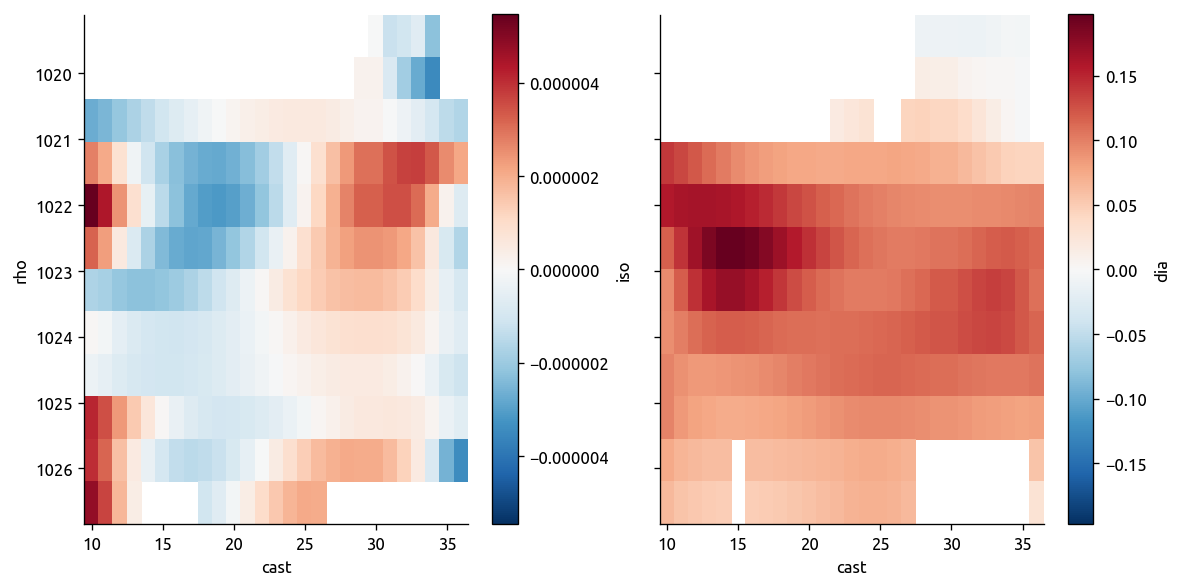

In [515]:
# 3. Calculate isopyncal and diapycnal gradients of the mean field
trmean_rho["dTiso"], trmean_rho["dTdia"] = ed.calc_iso_dia_gradients(
    trmean_rho["Tmean"], trmean_rho["Pmean"], debug=True
)
trmean_rho.dTiso.attrs["name"] = "Isopycnal ∇T"
trmean_rho.dTdia.attrs["name"] = "Diapycnal ∇T"

/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


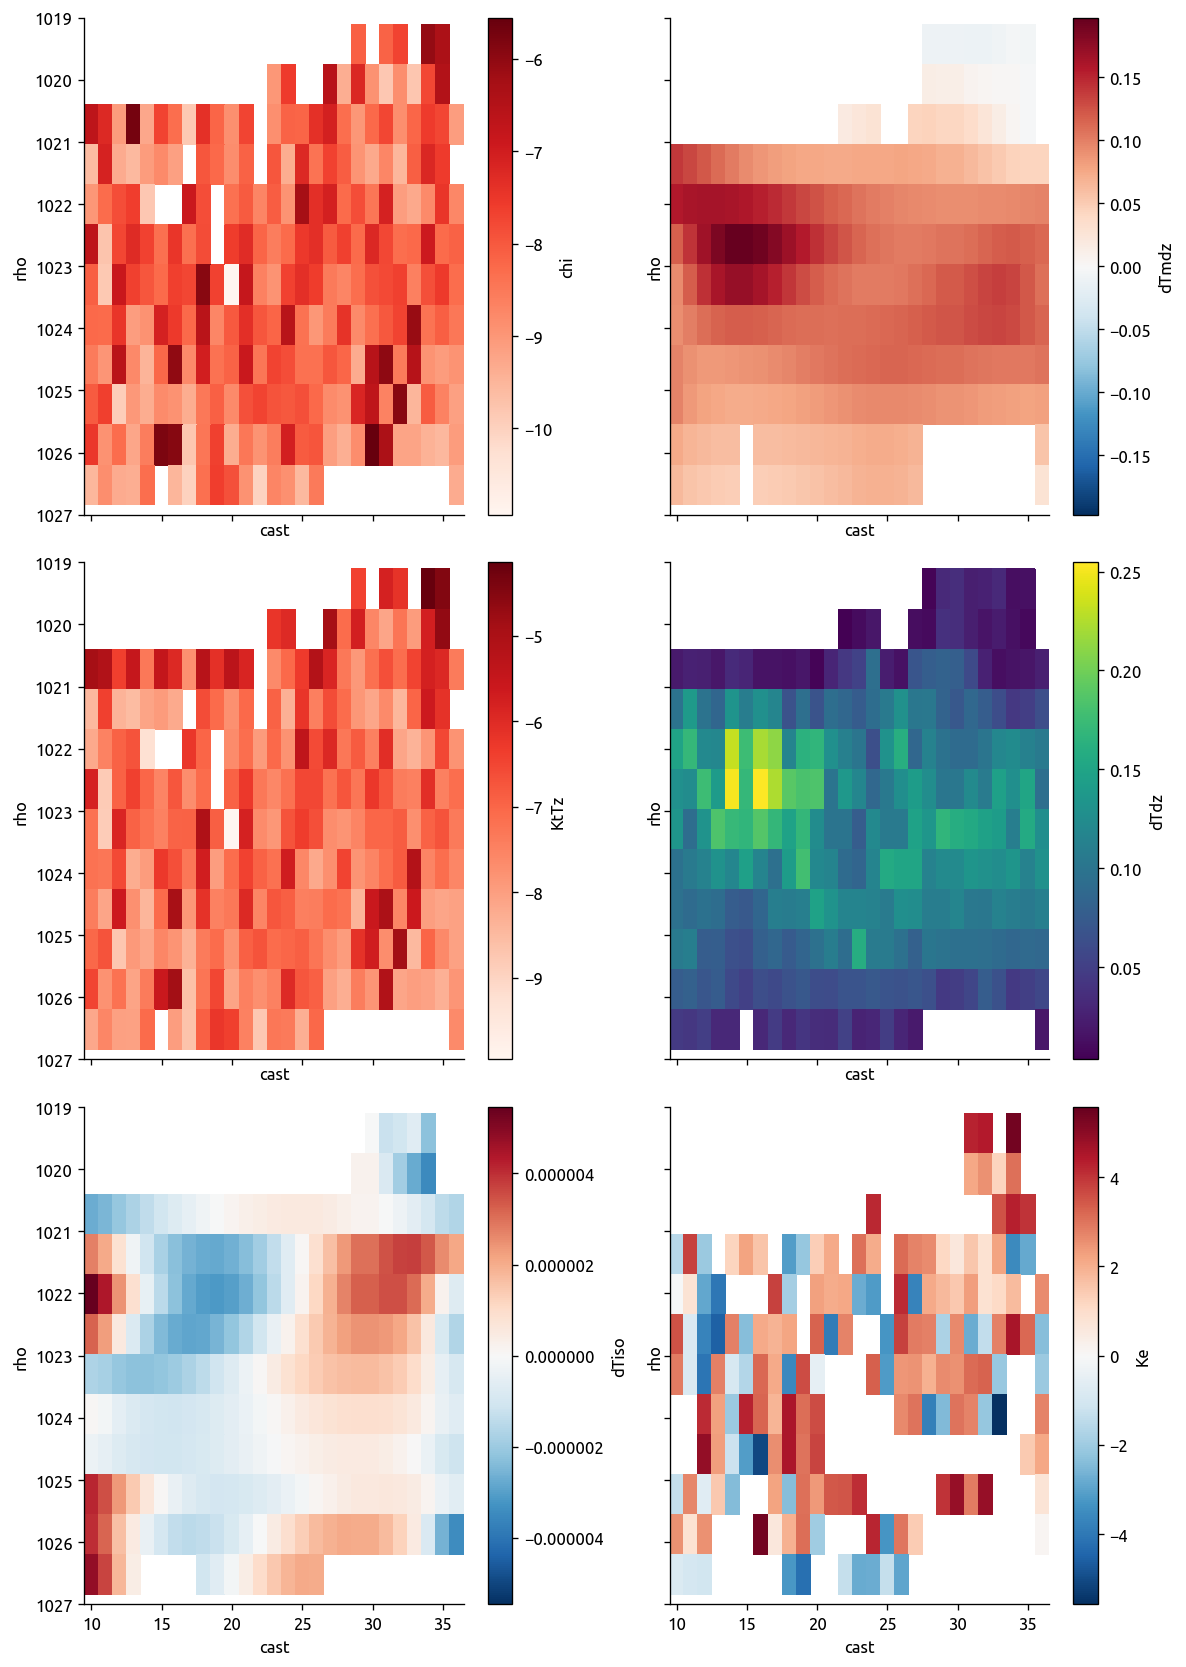

In [516]:
transKe = xr.Dataset()
transKe["KT"] = trmean_rho.KT
transKe["KtTz"] = trmean_rho.KtTz
transKe["dTdz"] = trmean_rho.dTdz
transKe["chi"] = trmean_rho.chi
transKe["dTmdz"] = trmean_rho.dTdia
transKe["dTiso"] = trmean_rho.dTiso
transKe["rho"].values = np.round(transKe.rho.values, decimals=2)
transKe["Tm"] = trmean_rho["Tmean"]
transKe.attrs["name"] = "BoB CTD χpod"


def calc_Ke(transKe, navg=None):

    transKe = transKe.copy()

    if navg is not None and np.isinf(navg):
        transKe = transKe.mean(dim="cast")

    elif navg is not None:
        cbins = np.arange(transKe.cast.min(), transKe.cast.max() + 1, navg)
        transKe = transKe.groupby_bins("cast", cbins, labels=cbins[:-1] + 1).mean(
            dim="cast"
        )

    transKe["Ke"] = (
        transKe.chi / 2 - transKe.KtTz * transKe.dTmdz
    ) / transKe.dTiso**2
    transKe.Ke.values[np.abs(transKe.dTiso.values) < 5e-7] = np.nan
    transKe.Ke["name"] = "$K_e$"

    transKe.attrs["navg"] = navg

    if "cast_bins" in transKe.coords:
        transKe = transKe.rename({"cast_bins": "cast"})

    return transKe


transKe = calc_Ke(transKe)

ed.plot_transect_Ke(transKe)

/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
/home/deepak/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


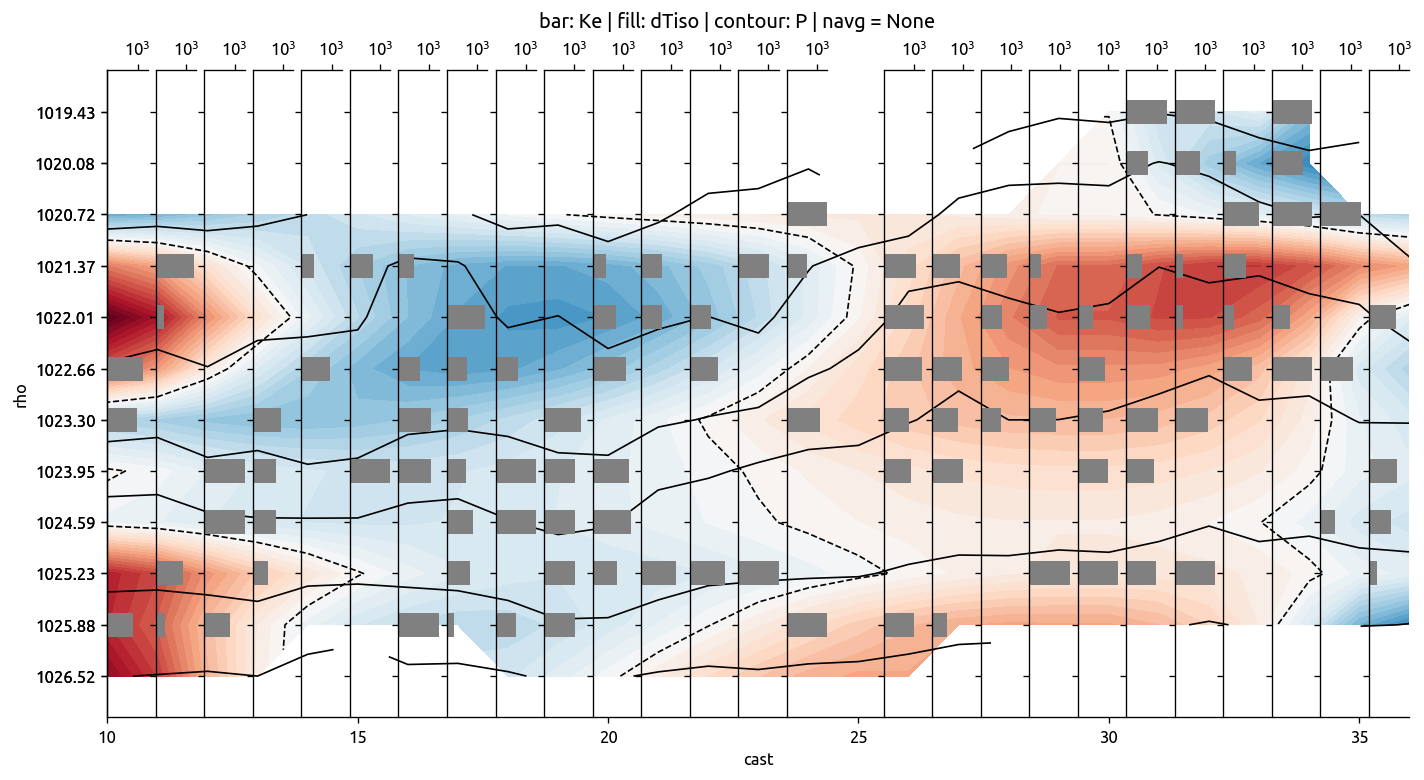

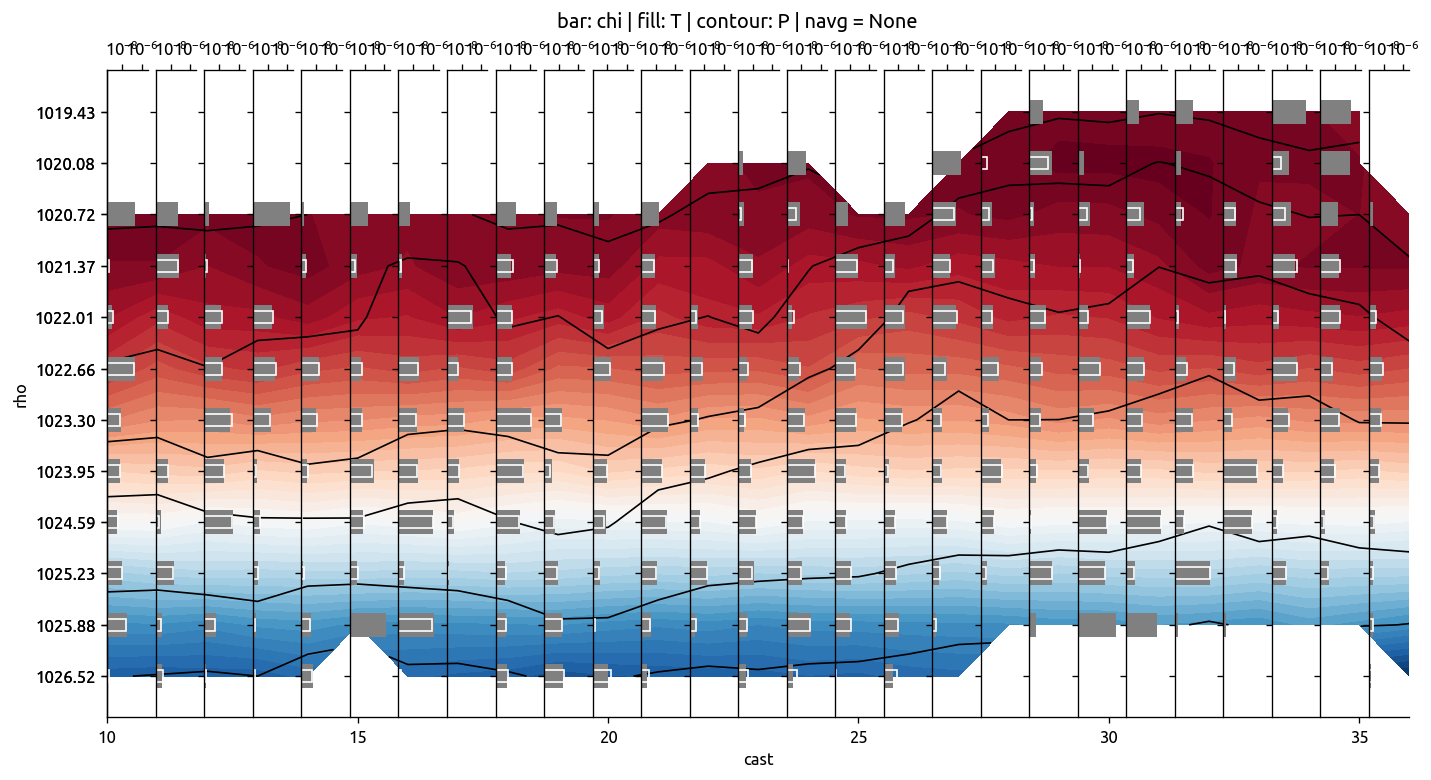

In [452]:
transKe2 = calc_Ke(transKe, navg=None)
ax, axback = ed.plot_transect_var(
    x="cast",
    y="rho",
    data=transKe2.Ke,
    fill=trmean_rho["dTiso"],
    contour=trmean_rho["P"],
    xlim=[1, 1e4],
    xticks=[1e3],
)
ax, axback = ed.plot_transect_var(
    x="cast",
    y="rho",
    data=transKe2.chi / 2,
    bar2=transKe2.KtTz * transKe2.dTmdz,
    fill=trmean_rho["T"],
    contour=trmean_rho["P"],
)

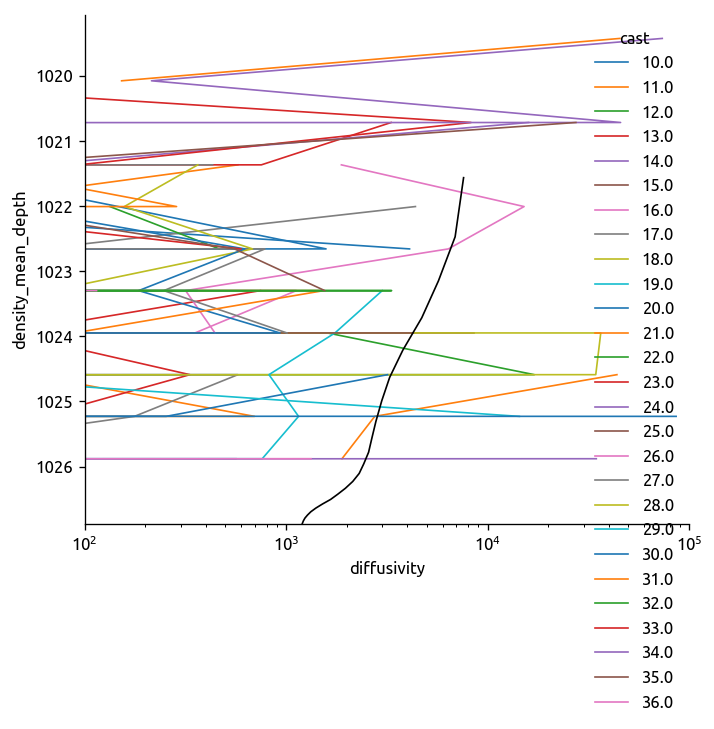

In [439]:
transKe2.Ke.plot.line(y="rho", hue="cast", yincrease=False)
plt.gca().set_xscale("log")
plt.gca().set_xlim([1e2, 1e5])

cole = ed.read_cole()

region = ed.get_region_from_transect(transect)

cole_bay = (cole.sel(lat=region["lat"])).mean(dim="lon").mean(dim="lat")
cole_bay["density_mean_depth"] += 1000
cole_bay = cole_bay.set_coords("density_mean_depth")
cole_bay.diffusivity.plot(y="density_mean_depth", color="k", yincrease=False)

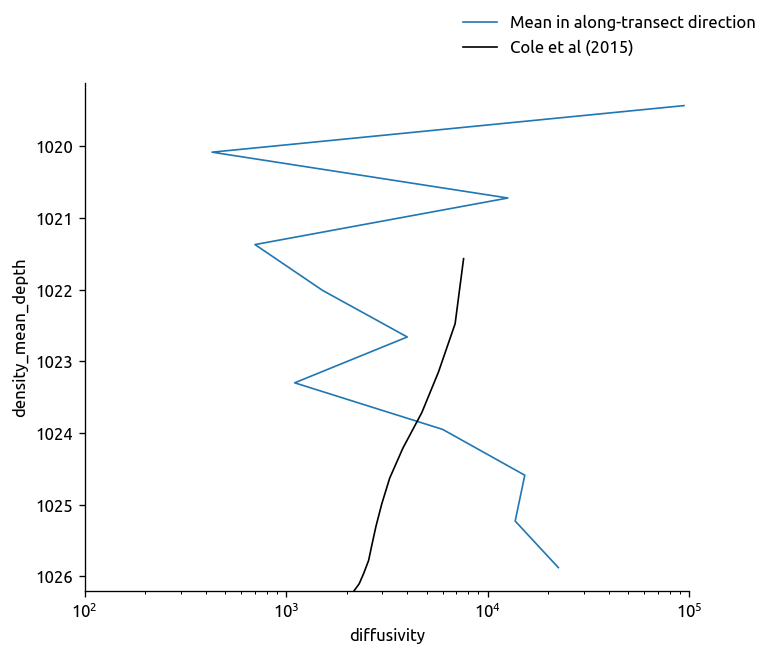

In [517]:
transKe2.Ke.where(transKe2.Ke > 0).mean(dim="cast").plot.line(y="rho")
cole_bay = (cole.sel(lat=region["lat"])).mean(dim="lon").mean(dim="lat")
cole_bay["density_mean_depth"] += 1000
cole_bay = cole_bay.set_coords("density_mean_depth")
cole_bay.diffusivity.plot(y="density_mean_depth", color="k", yincrease=False)

plt.gca().set_xscale("log")
plt.gca().set_xlim([1e2, 1e5])
plt.figlegend(["Mean in along-transect direction", "Cole et al (2015)"])

## Compare various mean fields / gradients

In [34]:
argo = xr.open_dataset(
    "../datasets/argo_clim_iso_gradients.nc", decode_times=False, autoclose=True
).load()

ecco = xr.open_dataset("../datasets/ecco_annual_iso_gradient.nc", autoclose=True).load()

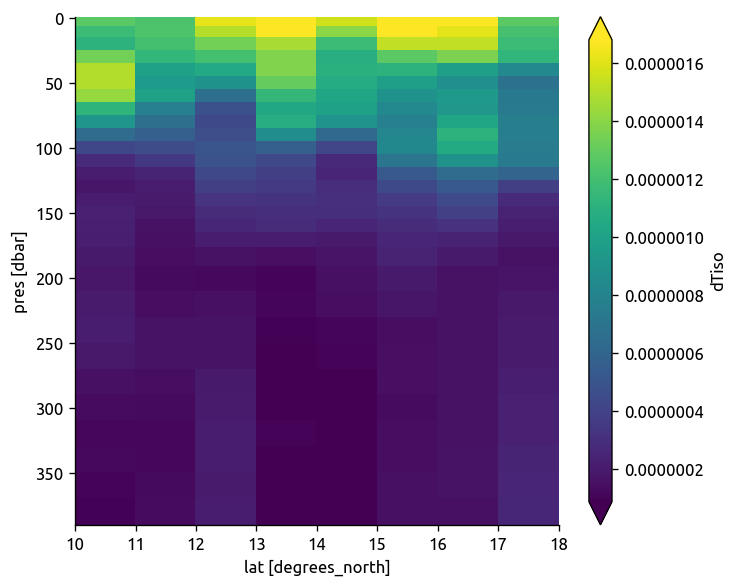

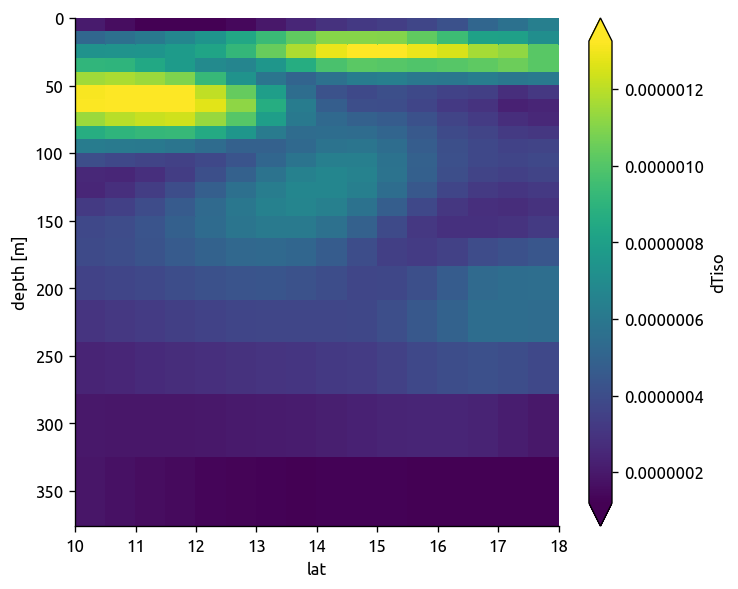

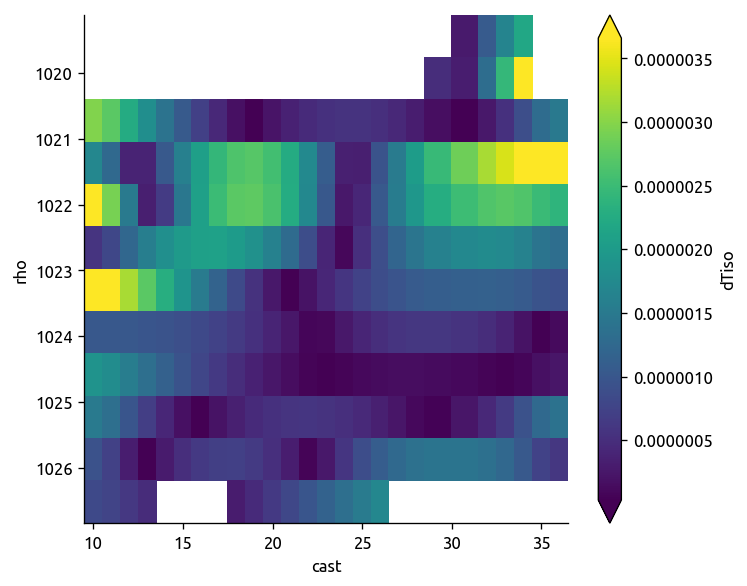

In [44]:
region = ed.get_region_from_transect(transect)

argo.dTiso.sel(**region).mean(dim="lon").plot(robust=True, yincrease=False)
plt.figure()
ecco.dTiso.sel(**region).mean(dim="lon").plot(robust=True, yincrease=False)

plt.figure()
np.abs(trmean_rho.dTiso).plot(robust=True, yincrease=False)

## Argo estimate (Cole et al, 2015)

(200, 0)

/home/deepak/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


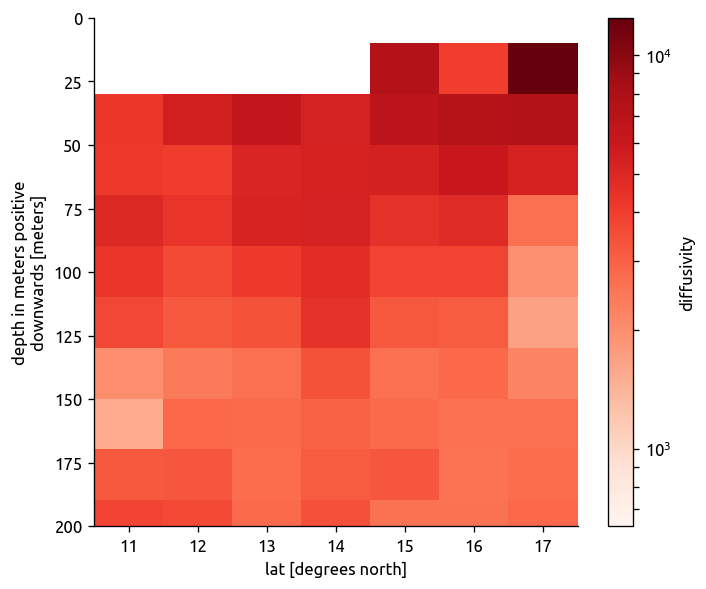

In [459]:
region = ed.get_region_from_transect(transect)

cole_bay = cole.sel(lat=region["lat"], lon=region["lon"])

(
    cole_bay.diffusivity.mean(dim="lon").plot(
        y="depth", yincrease=False, norm=mpl.colors.LogNorm(), cmap=mpl.cm.Reds
    )
)
plt.gca().set_ylim([200, 0])

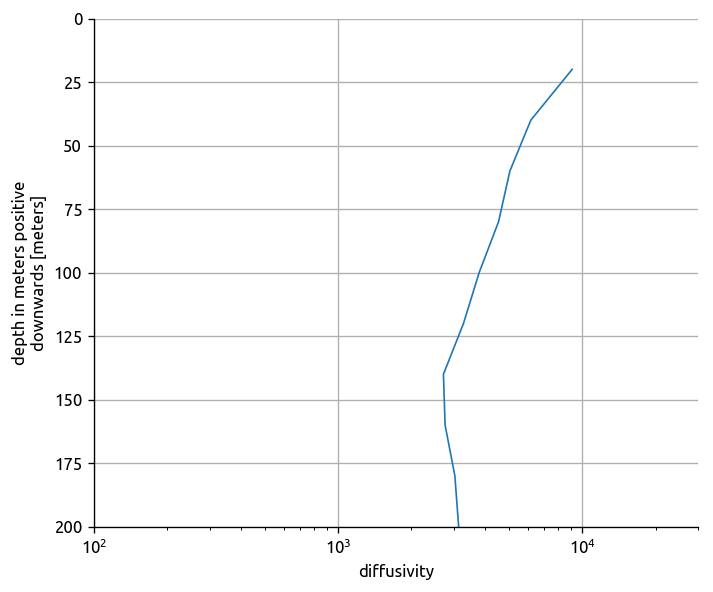

In [513]:
(
    cole_bay.diffusivity.mean(dim="lat")
    .mean(dim="lon")
    .plot.line(y="depth", yincrease=False)
)
plt.gca().set_xscale("log")
plt.gca().set_xlim([1e2, 3e4])
plt.gca().set_ylim([200, 0])
plt.gca().grid(True)

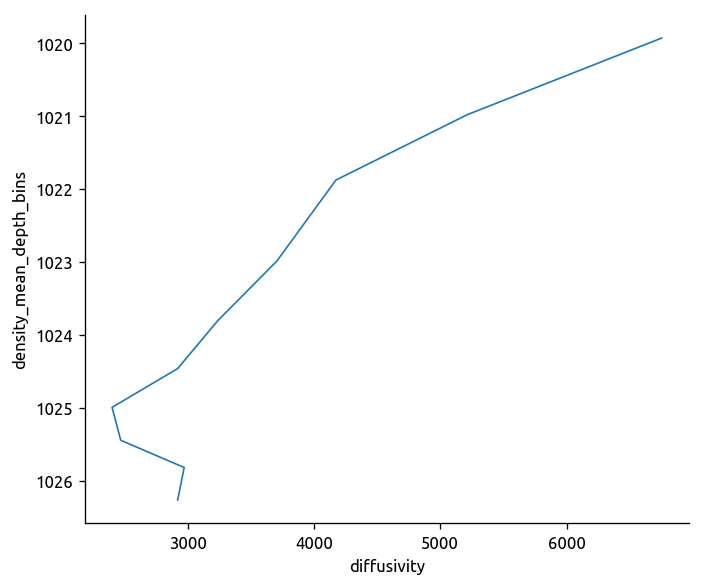

In [514]:
(
    cole_bay.diffusivity.groupby_bins(
        cole_bay.density_mean_depth + 1000, ρbins, labels=(ρbins[:-1] + ρbins[1:]) / 2
    )
    .mean()
    .plot.line(y="density_mean_depth_bins", yincrease=False)
)

## All data combined

Let's ignore 3 for now, not sure why that overlaps.

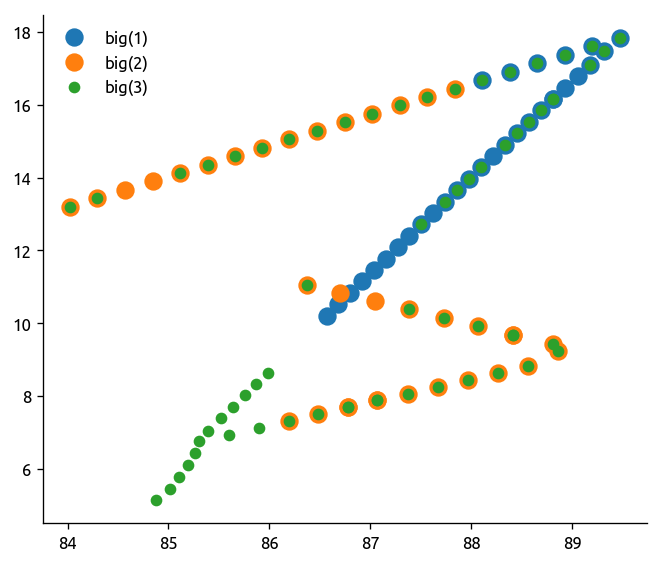

In [6]:
transect1 = xr.open_dataset("../datasets/bob-ctd-chipod/transect_1.nc", autoclose=True)

transect2 = xr.open_dataset("../datasets/bob-ctd-chipod/transect_2.nc", autoclose=True)

transect3 = xr.open_dataset("../datasets/bob-ctd-chipod/transect_3.nc", autoclose=True)

plt.plot(transect1.lon, transect1.lat, ".", ms=20)
plt.plot(transect2.lon, transect2.lat, ".", ms=20)
plt.plot(transect3.lon, transect3.lat, "o")
plt.legend(("big(1)", "big(2)", "big(3)"))

/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/deepak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


rho
(1019.0, 1020.6]      3938.569746
(1020.6, 1021.2]     10729.992555
(1021.2, 1022.7]     46947.664696
(1022.7, 1023.9]     -2230.156607
(1023.9, 1024.7]     -5942.732091
(1024.7, 1025.4]     48277.446666
(1025.4, 1026.0]     89531.725066
(1026.0, 1026.5]    316205.497546
(1026.5, 1026.9]     47694.340619
(1026.9, 1027.5]    -50417.990562
Name: Ke, dtype: float64

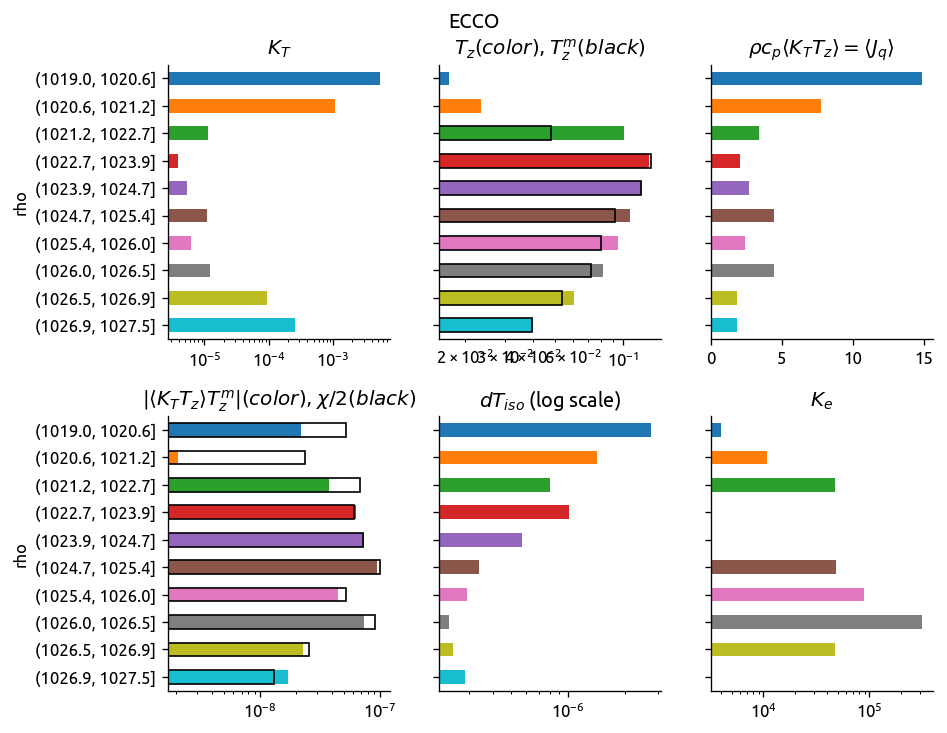

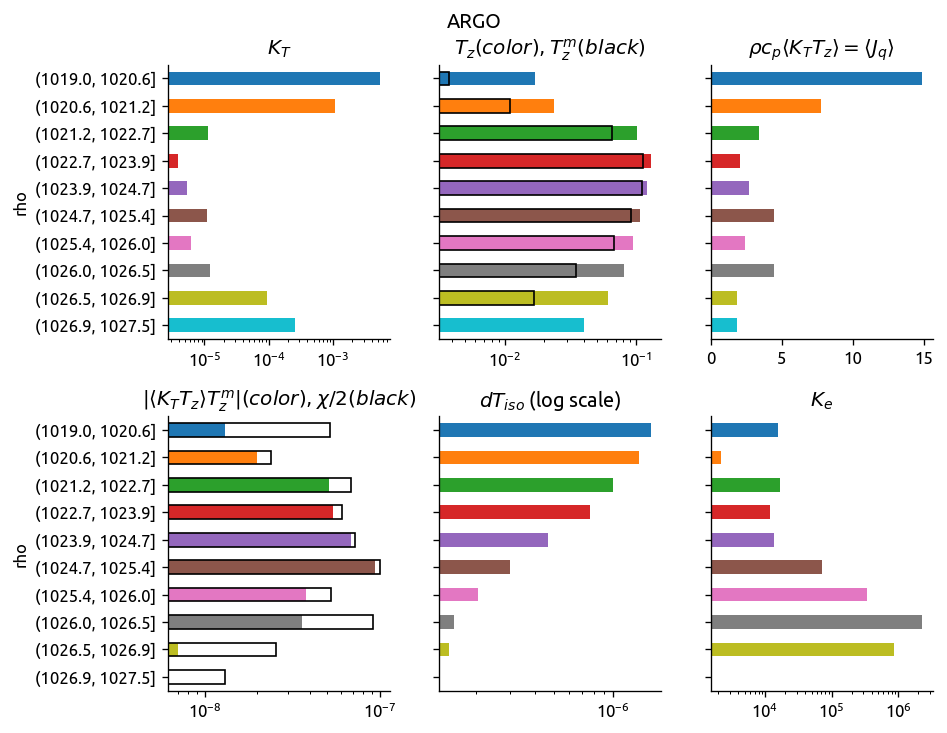

In [9]:
# merge transect 1 and transect2
transect = pd.concat(
    [tr.to_dataframe().reset_index() for tr in [transect1.sel(P=slice(0, 120))]]
)

transect["KtTz"] = transect["KT"] * transect["dTdz"]
transect["Jq"] = 1025 * 4200 * transect["KtTz"]

mask = np.logical_or(np.abs(transect["Jq"].values) > 2000, transect["KT"].values > 5e-3)

transect["KtTz"].values[mask] = np.nan
transect["Jq"].values[mask] = np.nan
transect["chi"].values[mask] = np.nan

eccoKe2 = ed.process_transect_1d(transect, eccograd, "ECCO")
argoKe2 = ed.process_transect_1d(transect, argograd, "ARGO")

ed.plot_bar_Ke(eccoKe2)
ed.plot_bar_Ke(argoKe2)

eccoKe2.Ke

(200, 0)

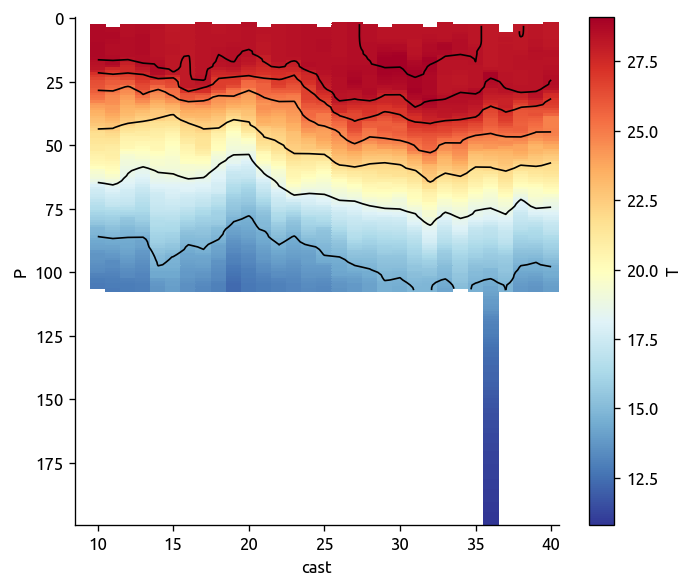

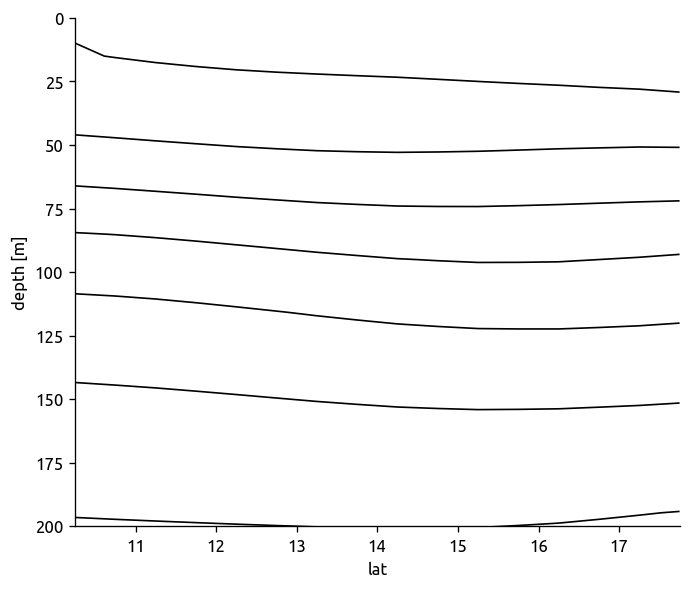

In [467]:
transect1["T"].sel(cast=slice(9, 40)).plot(cmap=mpl.cm.RdYlBu_r, yincrease=False)
transect1["rho"].sel(cast=slice(9, 40)).plot.contour(
    colors="k", levels=np.arange(1020, 1028), yincrease=False
)
plt.figure()

(
    eccograd["ρmean"]
    .sel(**ed.get_region_from_transect(transect1))
    .mean(dim="lon")
    .plot.contour(levels=np.arange(1020, 1028), colors="k", yincrease=False)
)
plt.gca().set_ylim([200, 0])

In [468]:
trmean, ρbins = ed.average_transect_1d(transect)

eccomean = ed.average_clim(eccograd, transect, ρbins)

eccomean

lat        lon        pres      Tmean      Smean  \
ρmean                                                                      
(1019.1, 1020.7]  16.507143  87.464286   10.333333  28.939016  32.836595   
(1020.7, 1021.2]  12.984742  87.032864   14.647887  28.798760  33.449447   
(1021.2, 1022.5]  12.422030  86.626856   39.381188  27.957727  33.956771   
(1022.5, 1023.4]  12.877078  86.702494   67.187101  25.848192  34.483206   
(1023.4, 1024.2]  13.092742  86.763441   84.984611  23.781918  34.670366   
(1024.2, 1024.7]  12.621930  86.674561   98.163965  22.012167  34.765387   
(1024.7, 1025.2]  12.814516  86.855572  113.221291  20.440335  34.814054   
(1025.2, 1025.7]  12.620301  86.759398  127.308123  18.991971  34.855904   
(1025.7, 1026.0]  11.579341  86.423653  136.347489  17.930917  34.884922   
(1026.0, 1026.5]  12.843915  86.653439  157.727486  16.558279  34.917639   

                  RHOAnoma        ρmean         dTiso     dTdia         dSiso  \
ρmean                                                                           
(1019.1, 1020.7] -8.500231  1020.499769  7.333585e-07  0.005335  1.824942e-06   
(1020.7, 1021.2] -7.972470  1021.027530  6.038192e-07  0.011383  9.272963e-07   
(1021.2, 1022.5] -7.209345  1021.790655  8.870507e-07  0.054069  5.606805e-07   
(1022.5, 1023.4] -6.026892  1022.973108  9.335261e-07  0.107467  4.611139e-07   
(1023.4, 1024.2] -5.187314  1023.812686  7.491000e-07  0.123242  3.328542e-07   
(1024.2, 1024.7] -4.548118  1024.451882  6.128813e-07  0.117844  2.484168e-07   
(1024.7, 1025.2] -4.011924  1024.988076  4.669423e-07  0.104717  1.765324e-07   
(1025.2, 1025.7] -3.536118  1025.463882  3.916333e-07  0.093500  1.250950e-07   
(1025.7, 1026.0] -3.205289  1025.794711  4.132742e-07  0.082132  9.679136e-08   
(1026.0, 1026.5] -2.753373  1026.246627  3.859926e-07  0.072626  6.896777e-08   

                     dSdia  dTdz_local      dSdz       Pmean      dTdz  
ρmean                                                                   
(1019.1, 1020.7]  0.013389    0.005335 -0.013389   10.333333  0.032508  
(1020.7, 1021.2]  0.009727    0.011383 -0.009727   14.647887  0.032730  
(1021.2, 1022.5]  0.020746    0.054069 -0.020746   39.381188  0.053711  
(1022.5, 1023.4]  0.014878    0.107467 -0.014878   67.187101  0.100398  
(1023.4, 1024.2]  0.008024    0.123242 -0.008024   84.984611  0.126546  
(1024.2, 1024.7]  0.004501    0.117844 -0.004500   98.163965  0.120330  
(1024.7, 1025.2]  0.003152    0.104717 -0.003152  113.221291  0.103577  
(1025.2, 1025.7]  0.002424    0.093500 -0.002424  127.308123  0.111689  
(1025.7, 1026.0]  0.001976    0.082132 -0.001976  136.347489  0.101579  
(1026.0, 1026.5]  0.001861    0.072626 -0.001861  157.727486  0.064202

In [22]:
sp, Tsm = ed.fit_spline(eccomean["Pmean"], eccomean["Tmean"], k=3, debug=False)
plt.plot(sp.derivative(1)(eccomean["Pmean"]))
plt.plot(-eccomean.dTdz.values)

NameError: name 'eccomean' is not defined

## Lessons learned

### Don't interpolate when converting to density space

+The fields and gradients are different!+

*FALSE ALARM: This is because transect.P and transect.pres are different!*

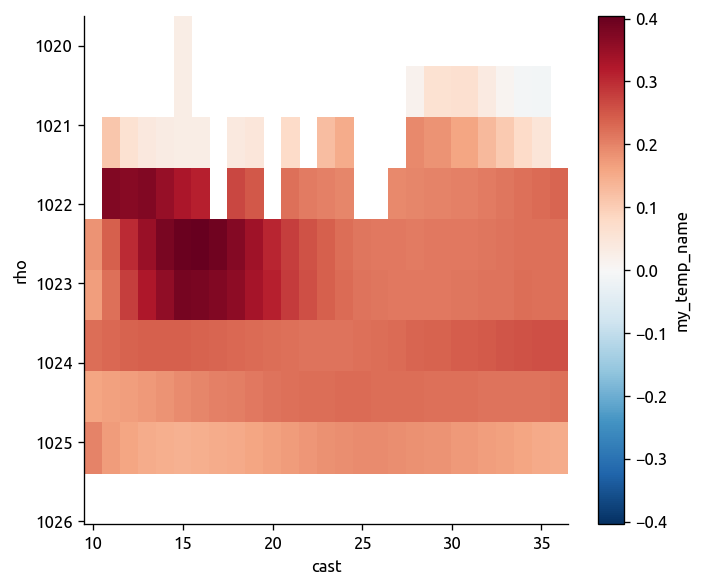

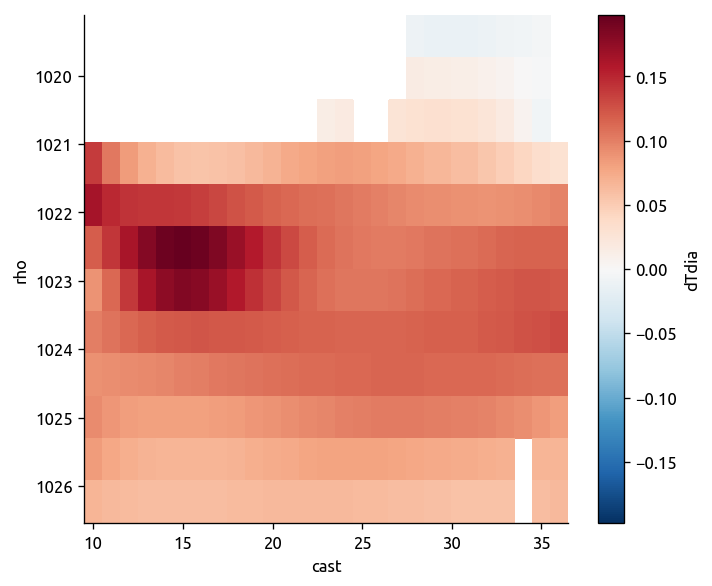

In [39]:
# transform to depth space, calculate gradient and transform back
Tsmooth = ed.to_depth_space(Tdens_i, Pold=Pdens_i, Pnew=None)
dTmdz = -ed.xgradient(Tsmooth, "P")
ed.to_density_space(dTmdz).plot(yincrease=False)

# original calculation ΔT and ΔP are estimated in density space
plt.figure()
trmean_rho.dTdia.plot(yincrease=False, x="cast")

### Spline-smooth both temperature and pressure

Below I calculate dT/dP in density space and compare that to dT/dP calculated by

1. transforming spline smoothed T to pressure space
1. differentiate to get dT/dP
1. convert back to density space and plot.

(120, 0)

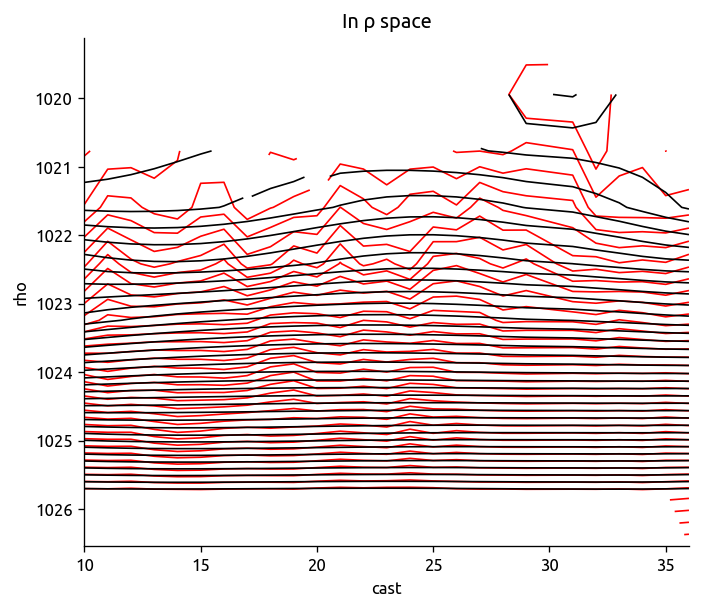

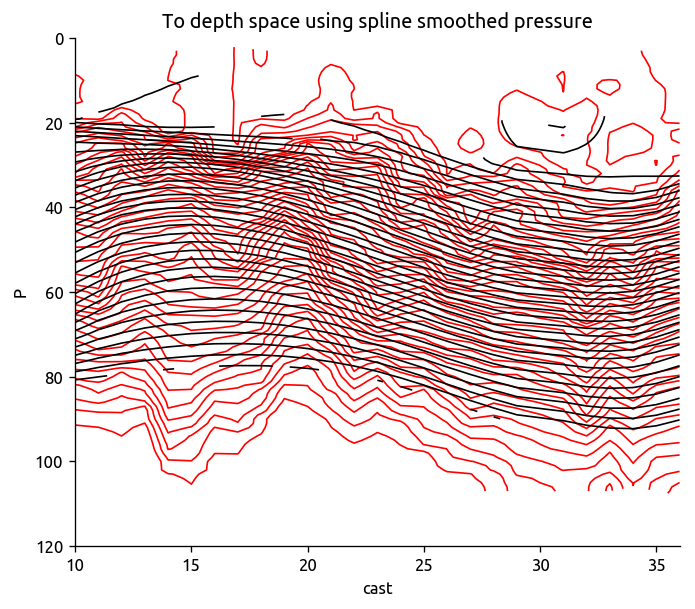

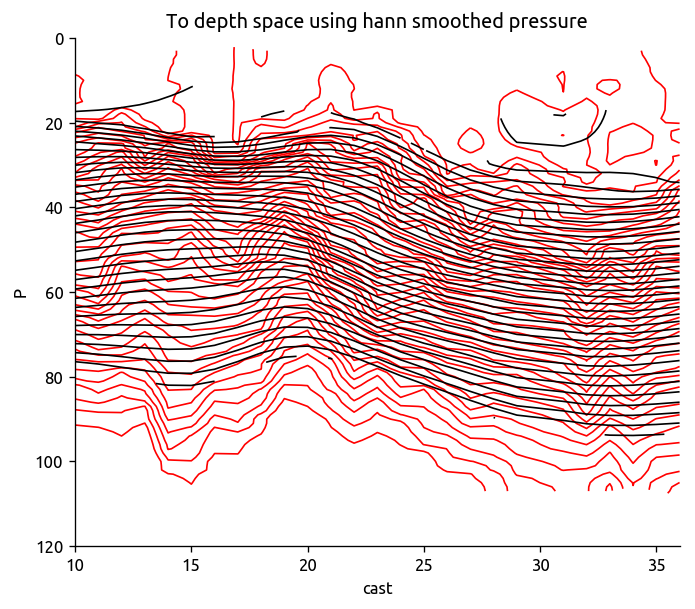

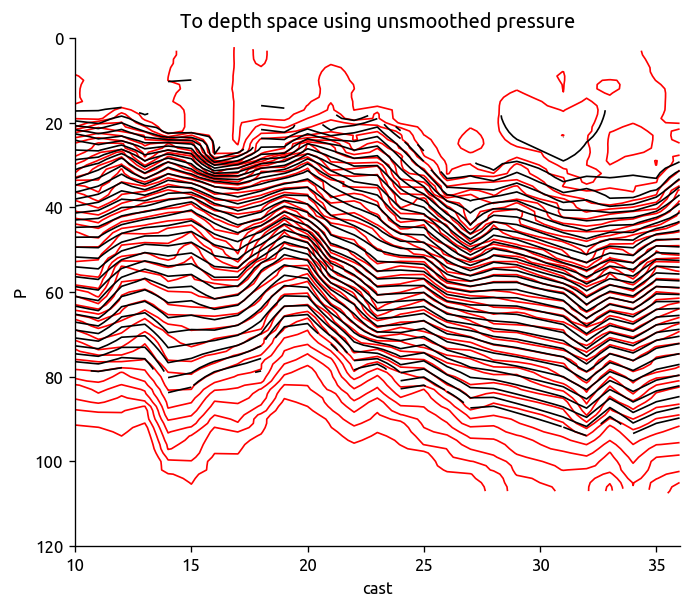

In [38]:
trdens = ed.to_density_space(transect)

plt.close("all")

Tdens_i = ed.smooth_cubic_spline(trdens["T"], False)
Pdens_i = ed.smooth_cubic_spline(trdens["P"], False)

levels = np.linspace(trdens["T"].min(), trdens["T"].max(), 40)
trdens["T"].plot.contour(colors="r", levels=levels)
Tdens_i.plot.contour(colors="k", levels=levels, yincrease=False)
plt.title("In ρ space")

plt.figure()
Tsmooth = ed.to_depth_space(Tdens_i, Pold=Pdens_i, Pnew=None)
transect["T"].plot.contour(colors="r", levels=levels, yincrease=False)
Tsmooth.plot.contour(colors="k", levels=levels, yincrease=False)
plt.title("To depth space using spline smoothed pressure")
plt.ylim([120, 0])

plt.figure()
psmooth = dcpy.ts.xfilter(trdens["P"], dim="cast", flen=10)
Tsmooth = ed.to_depth_space(Tdens_i, Pold=psmooth, Pnew=None)
transect["T"].plot.contour(colors="r", levels=levels, yincrease=False)
Tsmooth.plot.contour(colors="k", levels=levels, yincrease=False)
plt.title("To depth space using hann smoothed pressure")
plt.ylim([120, 0])


plt.figure()
Tsmooth = ed.to_depth_space(Tdens_i, Pold=trdens["P"], Pnew=None)
transect["T"].plot.contour(colors="r", levels=levels, yincrease=False)
Tsmooth.plot.contour(colors="k", levels=levels, yincrease=False)
plt.title("To depth space using unsmoothed pressure")
plt.ylim([120, 0])

### Groupby on dataframe or xarray consistently

xarray seems to use a different kind of index with groupby_bins.

### Test gradients in isopycnal planes

<xarray.Dataset>
Dimensions:  (x: 50, z: 200)
Coordinates:
  * z        (z) float64 0.0 2.513 5.025 7.538 10.05 12.56 15.08 17.59 20.1 ...
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
Data variables:
    dz       (z, x) float64 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 ...
    dx       (z, x) float64 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 ...
    mag      (z, x) float64 0.6021 0.6021 0.6021 0.6021 0.6021 0.6021 0.6021 ...
    dy       (z, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    name:     dT

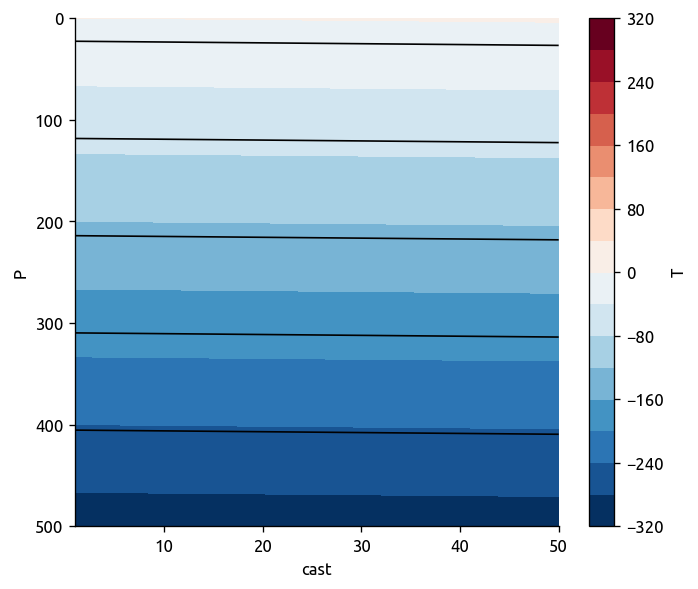

In [25]:
coords = {"cast": np.linspace(1, 50, 50), "P": np.linspace(0, 500, 200)}

T = xr.DataArray(
    np.ones((len(coords["P"]), len(coords["cast"]))) * np.nan,
    dims=["P", "cast"],
    coords=coords,
    name="T",
)

T = -0.6 * T.P + 0.05 * T.cast
T.name = "T"

rho = 1025 * (1 - 1.7e-4 * (T - 15))
rho.name = "$ρ$"

T.plot.contourf(levels=20)
rho.plot.contour(colors="k", yincrease=False)

dT = ed.gradient(T.rename({"P": "z", "cast": "x"}))
dT["dy"] = xr.zeros_like(dT["dx"])
dT.attrs["name"] = "dT"

drho = ed.gradient(rho.rename({"P": "z", "cast": "x"}))
drho["dy"] = xr.zeros_like(drho["dx"])
drho.attrs["name"] = "dρ"

dT

### Convert transect .mat to netcdf files

In [5]:
ed.convert_mat_to_netcdf()

/home/deepak/anaconda3/lib/python3.6/_collections_abc.py:743: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for key in self._mapping:
../eddydiff/eddydiff.py:571: RuntimeWarning: invalid value encountered in less
  mask2d = np.logical_or(transect['T'].values < 1,
../eddydiff/eddydiff.py:572: RuntimeWarning: invalid value encountered in less
  transect['S'].values < 1)
/home/deepak/anaconda3/lib/python3.6/_collections_abc.py:743: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for key in self._mapping:
../eddydiff/eddydiff.py:571: RuntimeWarning: invalid value encountered in less
  mask2d = np.logical_or